<a href="https://colab.research.google.com/github/willianandre2701/desafiopokemon/blob/main/4__Imersao_Dados_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando bibliotecas**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, r2_score

from numpy import isnan
from sklearn.impute import KNNImputer


# **Aula 01**

--- 

Aula 01 - Seu Primeiro Colab com Python e Pandas

--- 


In [ ]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url) # Importando o csv na url e passando o pd.read_csv para variavel dados

In [ ]:
dados.head(5) # imprimindo as 5 primeiras linhas do csv

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
dados # fazendo uma analise melhor dos dados para melhor entendimento e ver quantas linhas (rows) e colunas (columns)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [ ]:
dados.sample(10) # mais uma forma de analisar os dados de forma aleatoria para buscar mais entendimento, bom para verificar os dados 
# NaN (para verificar os dados NaN)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
8107,NaN,Parque Savoy City,São Paulo,165,3,2,2,R$ 498.000
7142,Rua Alberto Faria,Alto de Pinheiros,São Paulo,398,4,5,3,R$ 5.950.000
2580,NaN,Jardim Guedala,São Paulo,933,4,7,9,R$ 8.600.000
5240,Rua Félix Della Rosa,Vila Anglo Brasileira,São Paulo,195,3,2,2,R$ 1.500.000
8681,Avenida Amarilis,Cidade Jardim,São Paulo,840,4,7,4,R$ 5.899.000
7208,Rua Menaldo Rodrigues,Jardim Luzitânia,São Paulo,580,4,5,4,R$ 5.900.000
6038,Rua Tomé Portes,Brooklin Paulista,São Paulo,445,3,4,8,R$ 4.000.000
8957,NaN,Chácara Monte Alegre,São Paulo,420,4,5,3,R$ 1.978.000
7508,Rua Balata,Jardim Guairaca,São Paulo,276,3,3,6,R$ 950.000
3895,Rua Baturité,Aclimação,São Paulo,331,3,1,2,R$ 1.200.000


In [ ]:
dados.info() # Utilizando .info para saber os Dtybe dos dados que estou trabalhando

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
dados["Bairro"][6522] # primeiro parametro está buscando na coluna bairro e o segundo parametro está dizendo qual linha irei mostrar 

'Vila Paulo Silas'

In [ ]:
dados.Metragem.mean() # Buscando a coluna metragem e utilizando o MEAN (média em inglês) e ele ja calcula a média da coluna Metragem

442.30065947242207

In [ ]:
dados["Metragem"].mean() # Uma outra forma de calcular a média 

442.30065947242207

In [ ]:
sum((dados["Bairro"] == "Vila Mariana")) # como ele retorna como true e false se a bairro vila mariana na coluna bairro ,
# true no valor boleano é == a 1 e false == 0 , com o sum((dados["Bairro"]== "Vila Mariana")) ele vai somar todos os valores True(1) e dar o resultado total de casas nesse bairro

184

In [ ]:
tem_imoveis_vila = (dados["Bairro"] == "Vila Mariana")
tem_imoveis_vila # estou guardando a lista das linhas que possuem vila mariana da coluna bairro em uma variavel

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [ ]:
imoveis_vila_mariana = dados[tem_imoveis_vila]
imoveis_vila_mariana # criando uma nova classe para melhor manipulação dos dados de vila mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [ ]:
imoveis_vila_mariana["Metragem"].mean() # tirando a média(mean) da Metragem(metros quadrados) da vila mariana

233.6195652173913

In [ ]:
dados["Bairro"].value_counts()# dando value_counts() consigo visualizar o quantidade de imoveis em cada bairro dos meus dados do csv

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

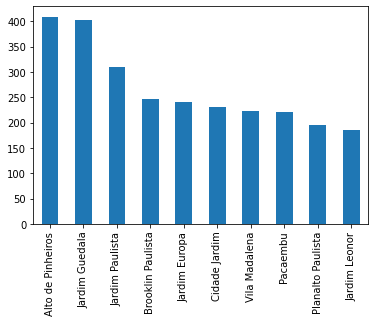

In [ ]:
# Mesmo sem utilizar nenhuma biblioteca e somente com o pandas podemos plotar um gráfico simples
n_imoveis_bairro = dados["Bairro"].value_counts() 
n_imoveis_bairro.head(10).plot.bar();


# **Desafios Aula 01**

## 1. Realizar a média da metragem para cara um dos bairros (Paulo)

In [ ]:
# de acordo com os parametros indicados a função groupby agrupa os dados
dados.groupby("Bairro")["Metragem"].mean()

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

## 2. formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

In [ ]:
# imprimindo todas as linhas que possuem bairro igual a "Vila Mariana"
dados[dados["Bairro"] == "Vila Mariana"]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [ ]:
# uma outra forma de pegar a informação mas agora através do metodo query
dados.query('Bairro == "Aclimação"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
269,"Rua Ximbó, 410",Aclimação,São Paulo,140,4,3,4,R$ 800.000
670,"Rua Alabastro, 151",Aclimação,São Paulo,129,3,2,3,R$ 960.000
1265,Rua Carlos Chagas,Aclimação,São Paulo,280,3,2,2,R$ 2.200.000
1287,Rua Doutor João Maia,Aclimação,São Paulo,380,3,5,2,R$ 2.660.000
1347,Rua Doutor João Maia,Aclimação,São Paulo,385,3,5,2,R$ 2.660.000
...,...,...,...,...,...,...,...,...
9260,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,São Paulo,120,3,2,1,R$ 900.001
9366,Rua Baturité,Aclimação,São Paulo,156,3,4,1,R$ 800.000
9418,Rua André Gouveia,Aclimação,São Paulo,199,3,4,3,R$ 1.930.000
9539,Rua Rubi,Aclimação,São Paulo,1500,4,2,6,R$ 5.000.000


## 3. Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

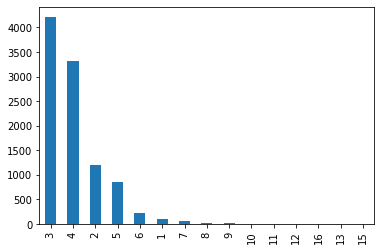

In [ ]:
imoveis_quartos = dados["Quartos"].value_counts()
imoveis_quartos.plot.bar()

**Com o gráfico acima podemos ver que a cidade de São Paulo possui em sua maioria imóveis com três quartos**

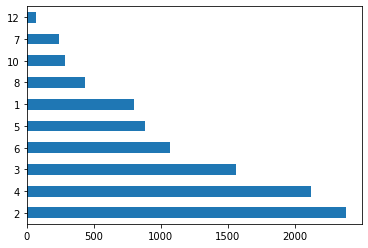

In [ ]:
imoveis_vagas = dados["Vagas"].value_counts()
imoveis_vagas.head(10).plot.barh()

**Com o gráfico acima podemos ver que a cidade de São Paulo possui em sua maioria imóveis com três quartos**

## 4. Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

In [ ]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


Com a descrição acima podemos visualizar que há um valor máximo de **40 banheiro** e **50 vagas** , que nos faz pensar que pode ser um condominio ou moradia coletiva ou então seria ume rro na base de dados à ser desconsiderado na análise

## 5. Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [ ]:
ruas_nan = dados[(dados["Rua"].isnull())] #.isnull vai me retornar e salvar na variavel todas os valores null da coluna rua
ruas_nan["Bairro"].value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

# **Aula 02**

---

Aula 02 - Tratamento de dados e primeiros gráficos

---

In [ ]:
dados.head() # lendo os dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
dados.info() # imprimindo as informações e tipos Dtype dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
dados["Valor"][0] # imprimindo o "Valor" da primeira linha

'R$ 7.000.000'

In [ ]:
dados["Valor"][0].split() # imprimindo o "Valor"  e separando a string R$ do numero

['R$', '7.000.000']

In [ ]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
590,"Rua Sócrates Abrahão, 16",Parque Munhoz,São Paulo,145,3,3,2,R$ 768.000
2559,Avenida Ireré,Planalto Paulista,São Paulo,337,3,4,10,R$ 2.150.000
8996,NaN,Bosque da Saúde,São Paulo,293,3,3,6,R$ 1.200.000
6837,Rua Xavier da Rocha,Parque da Vila Prudente,São Paulo,96,2,1,2,R$ 470.000
7919,Rua Constantino de Sousa,Campo Belo,São Paulo,208,3,2,2,R$ 1.280.000
5570,"Rua Ermelinda Americano, 117",Perdizes,São Paulo,205,3,3,2,R$ 1.500.000
9174,"Rua Simões Pinto, 48",Parque Jabaquara,São Paulo,200,3,1,2,R$ 650.000
3802,Avenida Ireré,Planalto Paulista,São Paulo,356,4,2,4,R$ 2.500.000
5985,Rua Cunha Gago,Pinheiros,São Paulo,105,1,2,1,R$ 700.000
785,Rua Professor Luciano Gualberto,Jardim Morumbi,São Paulo,1205,6,6,7,R$ 9.000.000


In [ ]:
dados["Valor"].str.split(expand = True) # visualizando a coluna valor e percebendo que a valores que precisam ser limps como /Mês

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [ ]:
len(dados["Valor"].str.split(expand = True)[1].unique()) # com esse len vemos que possuem "1038 valores iguais"

1038

In [ ]:
dados["Valor"].str.split(expand = True)[2].unique() # com esse metodo agora vemos os tipos de objetos q existe no "Valor" none /mes  /ano /dia

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [ ]:
dados[["Valor", "Bairro"]] # imprimindo as duas colunas Valor e Bairro novamente

,Valor,Bairro
0,R$ 7.000.000,Planalto Paulista
1,R$ 3.700.000,Jardim dos Estados
2,R$ 380.000,Jardim Reimberg
3,R$ 685.000,Jardim Morumbi
4,R$ 540.000,Mooca
...,...,...
10003,R$ 665.000,Vila Sofia
10004,R$ 2.300.000,Bosque da Saúde
10005,R$ 1.050.000,Vila da Saúde
10006,R$ 2.200\n /Mês,Vila Oratório


In [ ]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True) # mudando o nome das colunas depois de separalas
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [ ]:
dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique() # ["Tipo_anuncio"].unique() estou pegando so a coluna do tipo anucio

array([None], dtype=object)

In [ ]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas # passando dados[dados["Tipo_anuncio"].isnull()] para dados_vendas pq assim se eu quiser fazer uma comparação desse dados filtrados(dados_vendas) com o dados n filtrados(dados)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [ ]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [ ]:
dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)  # str.replace(".","")estou subistituindo o "." por nada "" //  .astype(float) converte eles para o tipo float 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_anuncio, Length: 9156, dtype: float64

In [ ]:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados_vendas.info() #mostrando que foi adicionado mais uma coluna "Valor_anuncio_float" que é do tipo float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


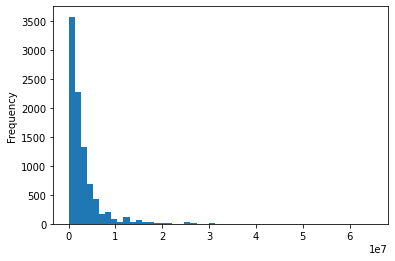

In [ ]:
dados_vendas["Valor_anuncio_float"].plot.hist(bins = 50); # eixo X são quantidade de casas e o eixo Y são o valor das casa sendo que 1 é = 1.000.000 e assim por diante

In [ ]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

dados_vendas.describe() 
# count = quantas linhas 
# mean = média
# std = desvio padrão 
# min = minimo 
# 25% 50% 75% = quartis
# max = máxima

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [ ]:
dados_vendas[["Rua", "Bairro", "Cidade"]].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


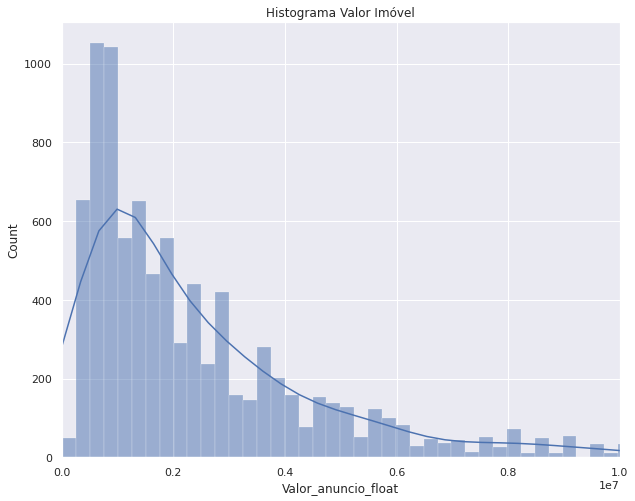

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True)
ax.set_title("Histograma Valor Imóvel")
plt.xlim((-50, 10000000))
plt.show()

# **Desafios Aula 02**

## 1. Criar uma escala de valores em milhões

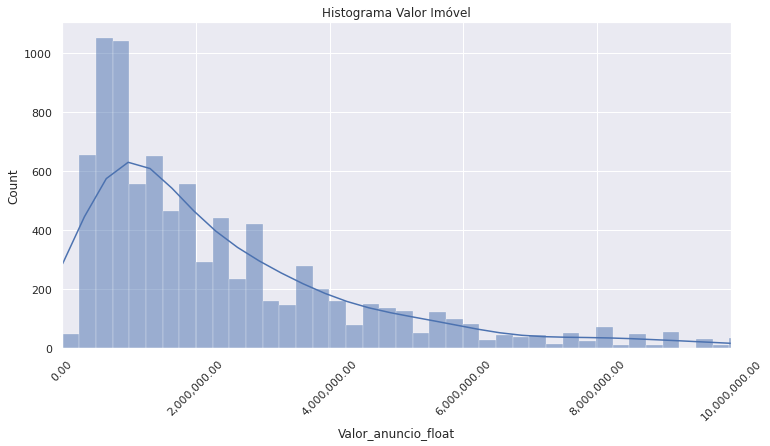

In [ ]:
# pequeno ajuste na escala do eixo x
plt.figure(figsize = (12, 6))
ax = sns.histplot(data = dados_vendas, x = 'Valor_anuncio_float', kde = True)
ax.set_title('Histograma Valor Imóvel')

# formatando os tickers do eixo x (Valor imóvel em milhões)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xticks(rotation=45)

plt.xlim((-50, 10000000))

plt.show()

In [ ]:
dados_vendas['Valor_anuncio_float'] / 1000000

0       7.00
1       3.70
2       0.38
3       0.69
4       0.54
        ... 
10002   1.50
10003   0.67
10004   2.30
10005   1.05
10007   0.27
Name: Valor_anuncio_float, Length: 9156, dtype: float64

## 2. Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

In [ ]:
# função para formatar a escala do eixo x
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

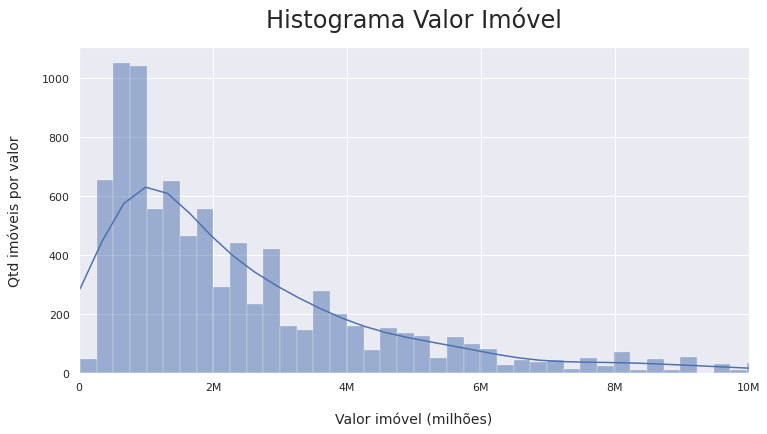

In [ ]:
# plotando histograma utilizando a lib seaborn
plt.figure(figsize = (12, 6))
ax = sns.histplot(data = dados_vendas, x = 'Valor_anuncio_float', kde = True)
ax.set_title('Histograma Valor Imóvel', pad = 20, fontsize = 24)

plt.xlabel('Valor imóvel (milhões)', labelpad = 20, fontsize = 14)
plt.ylabel('Qtd imóveis por valor', labelpad = 20, fontsize = 14)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

plt.xlim((-50, 10000000))

plt.show()

Preço do metro quadrado por bairro e plotar em um gráfico ideal

In [ ]:
# calculando o valor do metro quadrado agrupado por bairro
valor_metro_2_bairro = pd.DataFrame(dados_vendas.groupby('Bairro')['Valor_anuncio_float'].sum() / dados_vendas.groupby('Bairro')['Metragem'].sum())

In [ ]:
valor_metro_2_bairro.rename(columns = {0: 'Valor_m2_por_bairro'}, inplace = True)

In [ ]:
# selecionando apenas os 50 bairros com maior valor por m²
cinquenta_maiores_valor_m2_bairro = pd.DataFrame(valor_metro_2_bairro['Valor_m2_por_bairro'].sort_values(ascending = False).head(50))
cinquenta_maiores_valor_m2_bairro

,Valor_m2_por_bairro
Bairro,
Vila Guaca,80000.00
Jardim América,25417.48
Jardim Teresa,22884.32
Jardim Europa,20304.57
Vila Nova Conceição,17576.07
Morro dos Ingleses,17357.14
Jardim Luzitânia,16961.10
Jardim Paulista,16395.70
Jardim Paulistano,14913.54


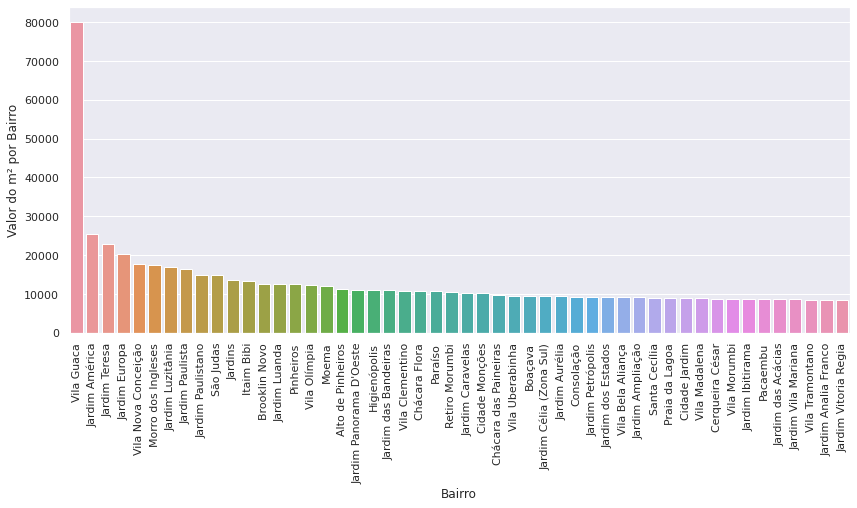

In [ ]:
plt.figure(figsize = (14, 6))
ax = sns.barplot(data = cinquenta_maiores_valor_m2_bairro, x = cinquenta_maiores_valor_m2_bairro.index, y = 'Valor_m2_por_bairro')

plt.ylabel('Valor do m² por Bairro')
plt.xticks(rotation=90)

plt.show()


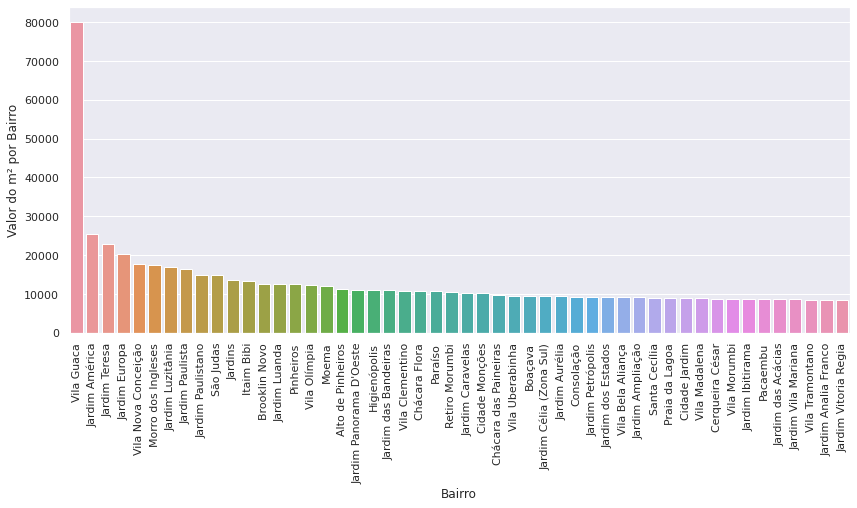

In [ ]:
plt.figure(figsize = (14, 6))
ax = sns.barplot(data = cinquenta_maiores_valor_m2_bairro, x = cinquenta_maiores_valor_m2_bairro.index, y = 'Valor_m2_por_bairro')

plt.ylabel('Valor do m² por Bairro')
plt.xticks(rotation=90)

plt.show()


Através da análise do gráfico de barras, em evidencia os 50 bairros com maior valor por metro quadrado, ficou destacado um ponto discrepante, o qual se trata do bairro Vila Guaca. Para inverstigar como estão dispostos os imóveis desse bairro, verificou-se que possui apenas 1 registro nesta localização, com valores que ocasionam certa preocupaçao: **1 imóvel com 10m2**, 3 quartos, 2 banheiros, 2 vagas, tendo seu valor em **R$ 800.000,00**, hipotese da metragem ter sido cadastrada de forma equivocada.

## 3. Explorar as bibliotecas de visualizações e colocar as suas conclusão

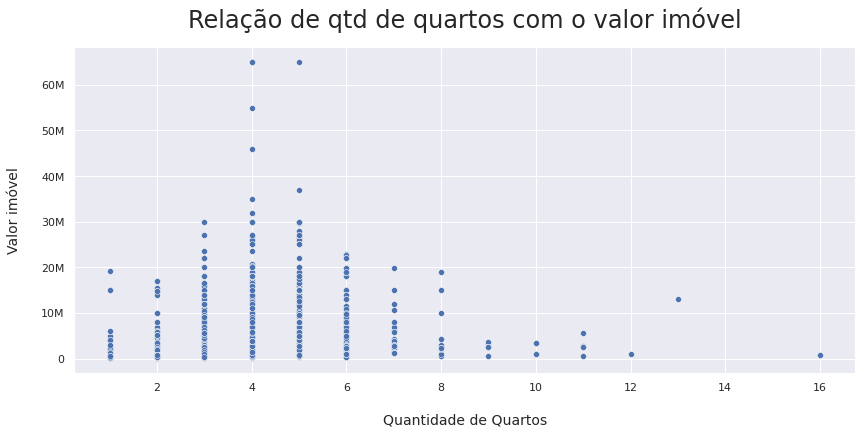

In [ ]:
# scatterplot para visualizar a relação entre a quantidade de quartos com o valor do imovel
plt.figure(figsize = (14, 6))

ax = sns.scatterplot(data = dados_vendas, x = 'Quartos', y = 'Valor_anuncio_float')

plt.title('Relação de qtd de quartos com o valor imóvel', pad = 20, fontsize = 24)
plt.xlabel('Quantidade de Quartos', labelpad = 20, fontsize = 14)
plt.ylabel('Valor imóvel', labelpad = 20, fontsize = 14)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

plt.show()

Visualizando o gráfico scatterplot relacionando as duas variáveis, há a hipotese dos imóveis com muitos quartos distorcendo as informações. Podemos ver que tem registro com 16 quartos com valor de imóvel abaixo da grande maioria (podendo ser de algum imóvel usado como republica). Por ser algo que está fugindo do padrão, precisamos verificar a possibilidade de retirar do conjunto de dados.

In [ ]:
dados_vendas.query('Quartos > 8 and Quartos < 17').sort_values(by = 'Valor_anuncio_float').head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
5829,"Rua Emanuel Guedes, 252",Conjunto Residencial Butantã,São Paulo,145,11,1,2,R$ 550.000,R$,550.000,None,550000.00
6888,Rua Manoel Benavente,Vila Picinin,São Paulo,240,9,6,1,R$ 600.000,R$,600.000,None,600000.00
9747,"Rua Otávio Passos, 0",Vila Gomes,São Paulo,285,16,3,3,R$ 790.000,R$,790.000,None,790000.00
9711,"Rua Otávio Passos, 0",Vila Gomes,São Paulo,280,16,3,3,R$ 790.000,R$,790.000,None,790000.00
5601,NaN,Jardim Gonzaga,São Paulo,383,10,8,8,R$ 950.000,R$,950.000,None,950000.00


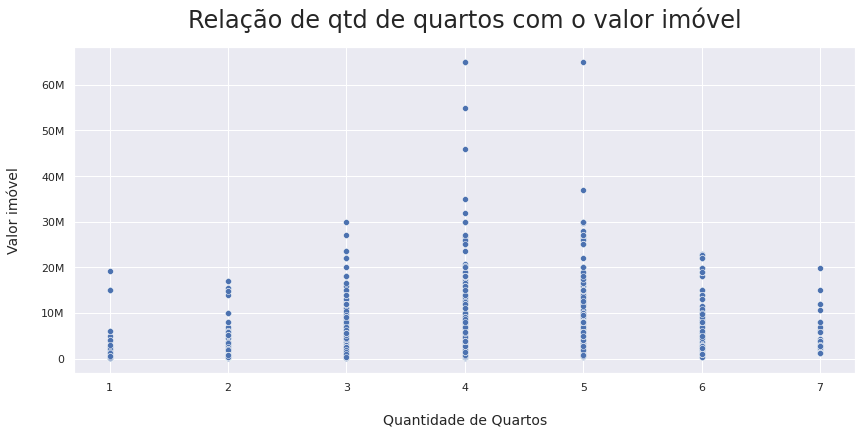

In [ ]:
# scatterplot para visualizar a relação entre a quantidade de quartos com o valor do imovel
plt.figure(figsize = (14, 6))

ax = sns.scatterplot(data = dados_vendas.query('Quartos < 8'), x = 'Quartos', y = 'Valor_anuncio_float')

plt.title('Relação de qtd de quartos com o valor imóvel', pad = 20, fontsize = 24)
plt.xlabel('Quantidade de Quartos', labelpad = 20, fontsize = 14)
plt.ylabel('Valor imóvel', labelpad = 20, fontsize = 14)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

plt.show()

## 4. Pesquisar um visualização para analisar os quartis, mediana e outliers

In [ ]:
valor_metro_2_bairro.head()

,Valor_m2_por_bairro
Bairro,
Aclimação,7162.69
Alto da Boa Vista,5708.74
Alto da Lapa,6961.30
Alto da Mooca,4385.00
Alto de Pinheiros,11126.34


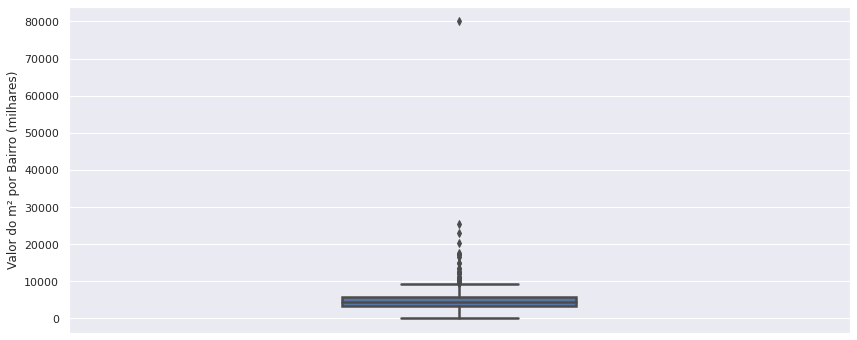

In [ ]:
# plotando boxplot dos valores do m² por Bairro
plt.figure(figsize = (14, 6))
ax = sns.boxplot(data = valor_metro_2_bairro, 
                 y = 'Valor_m2_por_bairro', 
                 linewidth=2.5,
                 width=0.3)

plt.ylabel('Valor do m² por Bairro (milhares)')

plt.show()

Podemos verificar que existem muitos outliers na base de dados quando analisamos os valores do m² por Bairro, distorcendo o gráfico. O outlier mais evidente trata-se do valor por m² do bairro Vila Guaca, o qual possui apenas 1 imóvel a venda. 

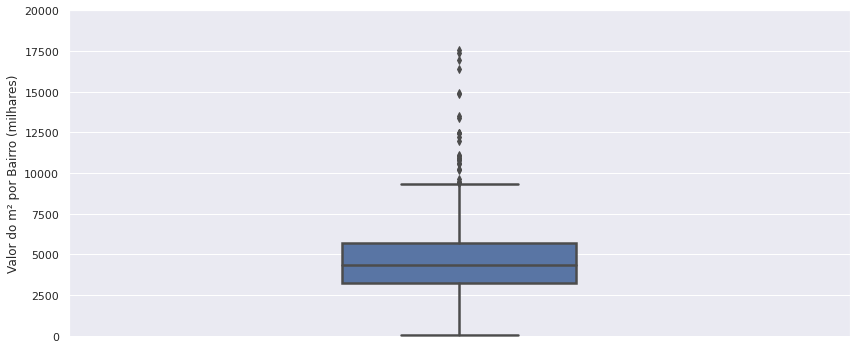

In [ ]:
# plotando boxplot dos valores do m² por Bairro, limitando até 20.000
plt.figure(figsize = (14, 6))
ax = sns.boxplot(data = valor_metro_2_bairro, 
                 y = 'Valor_m2_por_bairro', 
                 linewidth=2.5,
                 width=0.3)

plt.ylabel('Valor do m² por Bairro (milhares)')

plt.ylim(-50, 20000)

plt.show()

Limitando o valor do m² por Bairro para 20.000,00, trazemos uma melhor 
visualização, identificando que a grande concentração dos dados estão por volta de 2.700,00 e 5.500,00 reais. 

# **Aula 03**

---

Aula 03 - Gráficos, Time Series e Análise Explorátoria

---

In [ ]:
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00


In [ ]:
# calculando o valor do m² por bairro 
dados_vendas['Valor_anuncio_float'] / dados_vendas['Metragem']

0       7000.00
1       7459.68
2       3040.00
3       2209.68
4       5400.00
          ...  
10002   5617.98
10003   7000.00
10004   3801.65
10005   5121.95
10007   2213.11
Length: 9156, dtype: float64

In [ ]:
# adicionando uma coluna com o resultado do cálculo valor do m² por Bairro 
dados_vendas['Valor_m2'] = dados_vendas['Valor_anuncio_float'] / dados_vendas['Metragem']
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00


In [ ]:
# media do valor do m² por bairro 
dados_vendas.groupby('Bairro')['Valor_m2'].mean()

Bairro
Aclimação            7656.17
Alto da Boa Vista    5849.57
Alto da Lapa         7606.73
Alto da Mooca        5691.74
Alto de Pinheiros   11269.98
                      ...   
Vila Água Funda      4467.13
Água Branca          7269.11
Água Fria            5841.10
Água Funda           3876.86
Água Rasa            4509.61
Name: Valor_m2, Length: 697, dtype: float64

In [ ]:
# gerando um novo DataFrame com o retorno da soma dos valores das colunas do DataFrame dados_vendas
dados_bairro = dados_vendas.groupby('Bairro').sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25


In [ ]:
# após a soma de todos os valores, foi calculado novamente o valor do m² por Bairro
dados_bairro['Valor_m2_bairro'] = dados_bairro['Valor_anuncio_float'] / dados_bairro['Metragem']
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53


In [ ]:
# criando uma nova coluna com os valores calculados através do agrupamento por Bairro e a media do valor m² 
dados_bairro['Valor_m2_bairro_media'] = dados_vendas.groupby('Bairro')['Valor_m2'].mean()
dados_bairro.head()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro,Valor_m2_bairro_media
Bairro,,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69,7656.17
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74,5849.57
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30,7606.73
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00,5691.74
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34,11269.98


In [ ]:
# filtrando pelos 10 Bairros com mais anuncuios dentro da base de dados 
top_dez_bairros = dados_vendas['Bairro'].value_counts()[:10].index

In [ ]:
# transformando em lista para melhor visualização
top_dez_bairros = dados_vendas['Bairro'].value_counts()[:10].index.to_list()
top_dez_bairros

['Alto de Pinheiros',
 'Jardim Guedala',
 'Jardim Paulista',
 'Brooklin Paulista',
 'Jardim Europa',
 'Pacaembu',
 'Vila Madalena',
 'Cidade Jardim',
 'Planalto Paulista',
 'Jardim Leonor']

In [ ]:
# utiliza-se o simbolo @ para apontar para a variável fora do escopo
dados_bairro.query('Bairro in @top_dez_bairros')

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro,Valor_m2_bairro_media
Bairro,,,,,,,,
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34,11269.98
Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90,7264.92
Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10,8563.84
Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57,19962.69
Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65,8028.00
Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49,6563.88
Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70,16087.45
Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90,8768.36
Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54,6447.72


In [ ]:
# resetando o indice e transformando Bairro em uma coluna
dados_bairro.reset_index(inplace = True)

In [ ]:
dados_bairro.head()

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro,Valor_m2_bairro_media
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69,7656.17
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74,5849.57
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30,7606.73
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00,5691.74
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34,11269.98


Text(0.5, 0, 'Bairro')

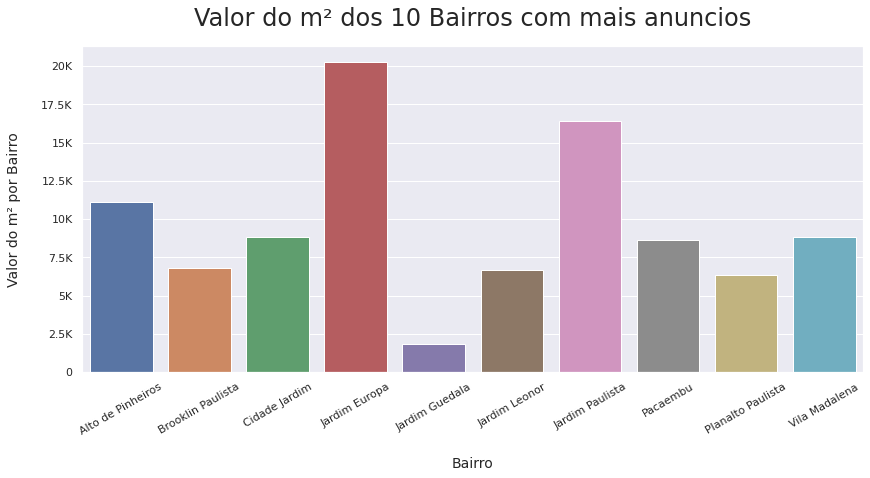

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.barplot(data = dados_bairro.query('Bairro in @top_dez_bairros'), x = 'Bairro', y = 'Valor_m2_bairro')# esse gráfico é sns.barplot
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

plt.xticks(rotation=30)#rotation ele gira a label que esta no eixo y 

plt.title('Valor do m² dos 10 Bairros com mais anuncios', pad = 20, fontsize = 24)
plt.ylabel('Valor do m² por Bairro', labelpad = 20, fontsize = 14)
plt.xlabel('Bairro', labelpad = 20, fontsize = 14)

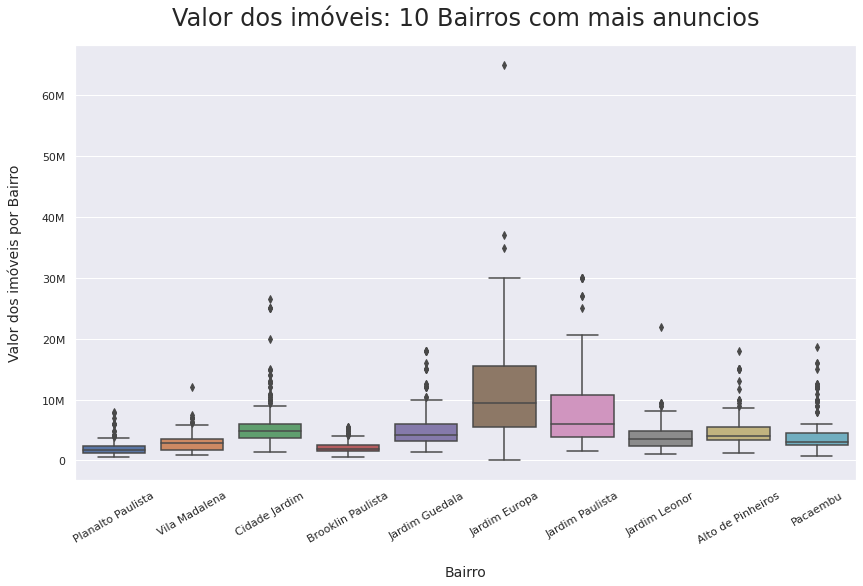

In [ ]:
plt.figure(figsize = (14, 8))
ax = sns.boxplot(data = dados_vendas.query('Bairro in @top_dez_bairros'), x = 'Bairro', y = 'Valor_anuncio_float')# esse gráfico é sns.boxplot
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

plt.xticks(rotation=30)

plt.title('Valor dos imóveis: 10 Bairros com mais anuncios', pad = 20, fontsize = 24)
plt.ylabel('Valor dos imóveis por Bairro', labelpad = 20, fontsize = 14)
plt.xlabel('Bairro', labelpad = 20, fontsize = 14)

plt.show()

In [ ]:
# vereficando o imóvel que identificamos como outlier no gráfico boxplot no bairro Jardim Europa
dados_vendas.query('Valor_anuncio_float > 50000000 and Bairro == "Jardim Europa"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
400,NaN,Jardim Europa,São Paulo,1510,5,5,20,R$ 65.000.000,R$,65.000.000,None,65000000.00,43046.36


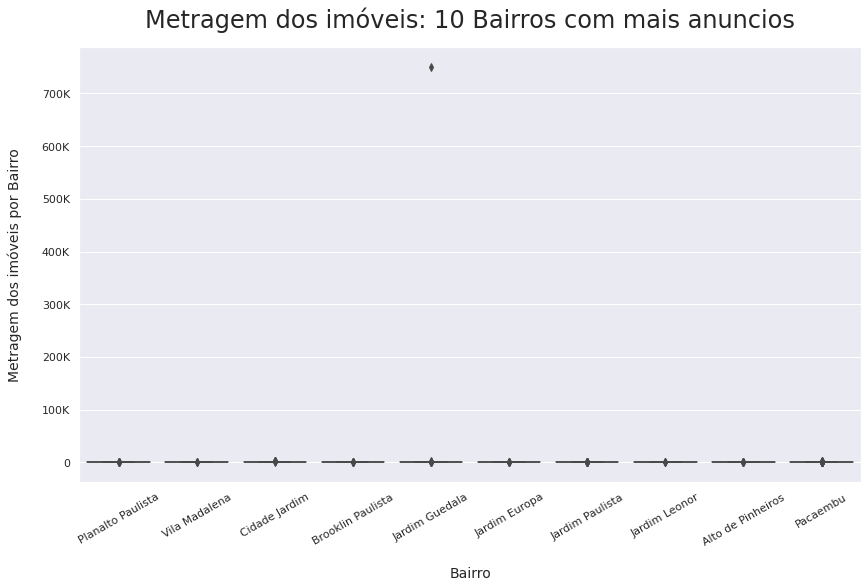

In [ ]:
plt.figure(figsize = (14, 8))
ax = sns.boxplot(data = dados_vendas.query('Bairro in @top_dez_bairros'), x = 'Bairro', y = 'Metragem')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

plt.xticks(rotation=30)

plt.title('Metragem dos imóveis: 10 Bairros com mais anuncios', pad = 20, fontsize = 24)
plt.ylabel('Metragem dos imóveis por Bairro', labelpad = 20, fontsize = 14)
plt.xlabel('Bairro', labelpad = 20, fontsize = 14)

plt.show()

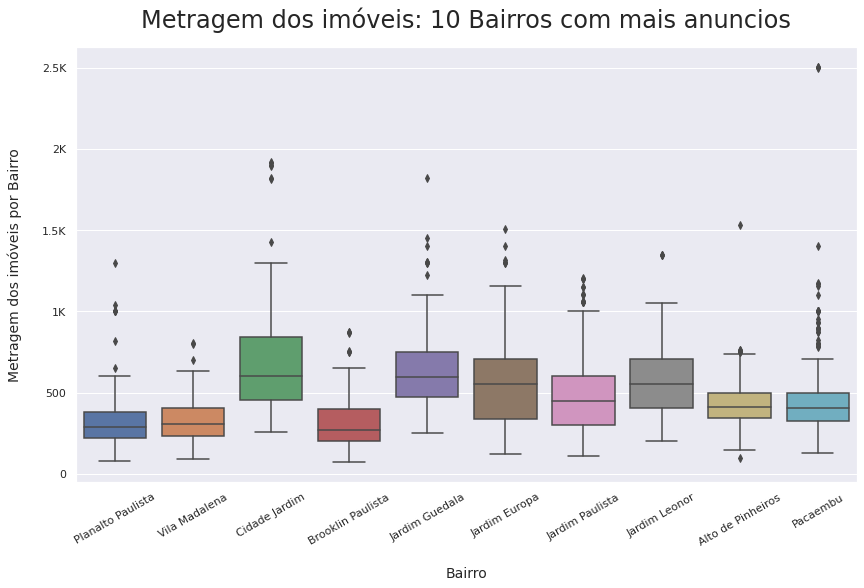

In [ ]:
plt.figure(figsize = (14, 8))
ax = sns.boxplot(data = dados_vendas.query('Bairro in @top_dez_bairros and Metragem < 30000'), x = 'Bairro', y = 'Metragem')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

plt.xticks(rotation=30)

plt.title('Metragem dos imóveis: 10 Bairros com mais anuncios', pad = 20, fontsize = 24)
plt.ylabel('Metragem dos imóveis por Bairro', labelpad = 20, fontsize = 14)
plt.xlabel('Bairro', labelpad = 20, fontsize = 14)

plt.show()

In [ ]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95


# **Desafios Aula 03** 

## 1. Tentar vincular dados do IBGE com os dados de imóveis

## 2. Tratar os outlier e comparar com os resultados

In [ ]:
# funcao para gerar boxplot com 2 colunas
def gera_box_plot(dados, colunax, colunay, titulo, xlabel, ylabel):
  plt.figure(figsize = (14, 8))
  ax = sns.boxplot(data = dados, x = colunax, y = colunay)
  ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

  plt.xticks(rotation=30)

  plt.title(titulo, pad = 20, fontsize = 24)
  plt.ylabel(xlabel, labelpad = 20, fontsize = 14)
  plt.xlabel(ylabel, labelpad = 20, fontsize = 14)

  plt.show()

In [ ]:
def gera_simples_box_plot(dados, titulo, xlabel, ylabel):
  plt.figure(figsize = (14, 8))
  ax = sns.boxplot(data = dados)

  ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

  plt.title(titulo, pad = 20, fontsize = 24)
  plt.xlabel(xlabel, labelpad = 20, fontsize = 14)
  plt.ylabel(ylabel, labelpad = 20, fontsize = 14)

  plt.show()

* criando duas funcões **def** para só chamalas e passar os parametros 

In [ ]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
count,9156.00,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96,8004.07
std,7856.42,1.05,1.97,2.60,3944208.19,5291.32
min,10.00,1.00,1.00,1.00,13000.00,9.33
25%,168.00,3.00,2.00,2.00,890000.00,4750.00
50%,276.00,3.00,4.00,4.00,1800000.00,6500.00
75%,450.00,4.00,5.00,5.00,3500000.00,9453.78
max,750000.00,16.00,40.00,50.00,65000000.00,80000.00


In [ ]:
dados_vendas['Metragem'].sort_values(ascending = False)

9845    750000
6600     37000
6883     35677
4788      2850
7791      2505
         ...  
8553        29
5059        25
5652        25
5009        20
9603        10
Name: Metragem, Length: 9156, dtype: int64

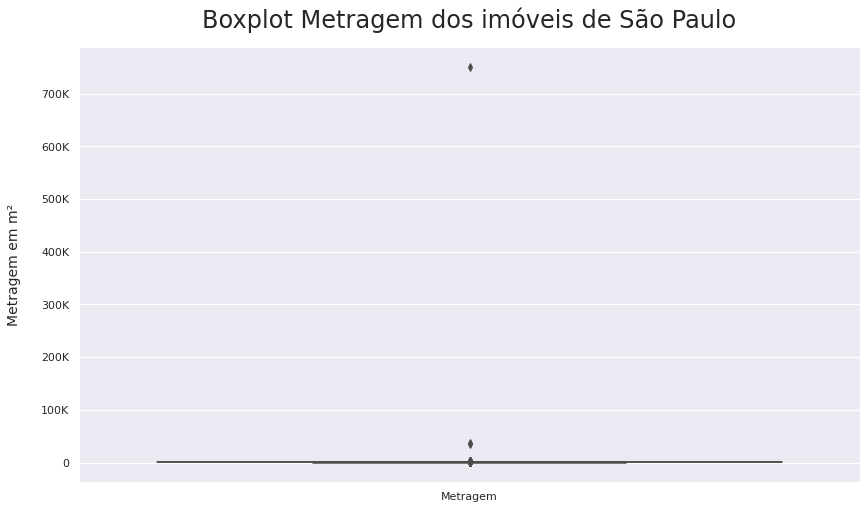

In [ ]:
gera_simples_box_plot(dados_vendas[['Metragem']], 
                      'Boxplot Metragem dos imóveis de São Paulo', '','Metragem em m²')

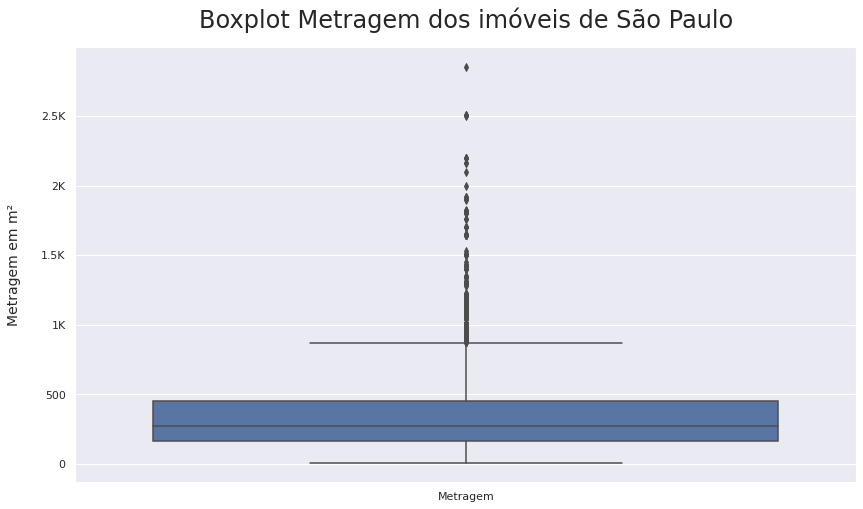

In [ ]:
gera_simples_box_plot(dados_vendas[['Metragem']].query('Metragem < 3000'), 
                      'Boxplot Metragem dos imóveis de São Paulo', '','Metragem em m²')

Funcão describe, boxplot

- Metragem: 75% dos dados estão abaixo da margem de 450 m², existem 3 imóveis com metragem maior que 30.000 m², sendo o mais impactante com 750.000 m²(por ora, iremos retirar da base, os imóveis com metragem > 3.000 m²

In [ ]:
# registros que serão retirados
dados_vendas.query('Metragem > 3000')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000,R$,2.900.000,None,2900000.00,78.38
6883,NaN,Jardim da Glória,São Paulo,35677,3,3,4,R$ 2.550.000,R$,2.550.000,None,2550000.00,71.47
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,9.33


In [ ]:
dados_vendas['Quartos'].sort_values(ascending = False)

9747    16
9711    16
1726    13
5175    12
6628    11
        ..
9653     1
7116     1
7405     1
6791     1
7095     1
Name: Quartos, Length: 9156, dtype: int64

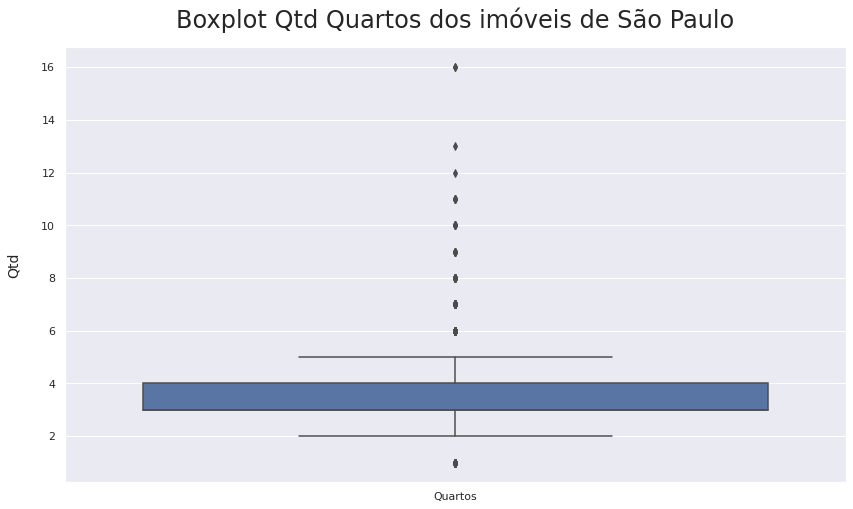

In [ ]:
gera_simples_box_plot(dados_vendas[['Quartos']], 
                      'Boxplot Qtd Quartos dos imóveis de São Paulo', '','Qtd')

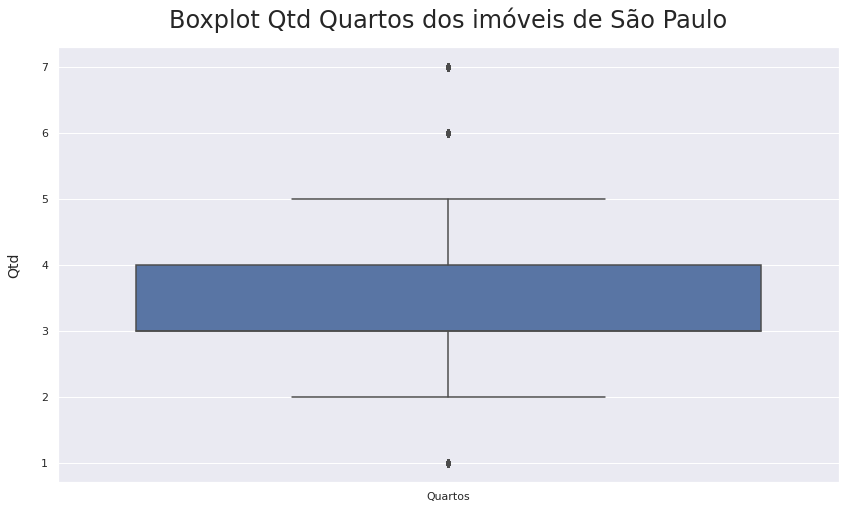

In [ ]:
gera_simples_box_plot(dados_vendas[['Quartos']].query('Quartos < 8'), 
                      'Boxplot Qtd Quartos dos imóveis de São Paulo', '','Qtd')

Funcão describe, boxplot

- Quartos: 75% dos dados estão abaixo da margem de 04 quartos. Existem imóveis com mais de 8, inclusive com 10, 11, 12, 13 e 16, sendo necessário uma investigação mais profunda (por ora, iremos retirar da base, os imóveis com 8 ou mais quartos). 

In [ ]:
# registros que serão retirados
dados_vendas.query('Quartos > 8')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
1127,Rua Bandim,Boaçava,São Paulo,350,11,8,10,R$ 2.500.000,R$,2.500.000,None,2500000.00,7142.86
1273,NaN,Vila Monumento,São Paulo,750,10,8,8,R$ 3.500.000,R$,3.500.000,None,3500000.00,4666.67
1589,Rua Sílvio Portugal,Pacaembu,São Paulo,950,9,12,6,R$ 3.200.000,R$,3.200.000,None,3200000.00,3368.42
1726,NaN,Jardim Paulista,São Paulo,450,13,7,7,R$ 13.000.000,R$,13.000.000,None,13000000.00,28888.89
2724,"Alameda Franca, 587",Jardim Paulista,São Paulo,137,9,2,1,R$ 2.600.000,R$,2.600.000,None,2600000.00,18978.10
2754,"Alameda Franca, 587",Jardim Paulista,São Paulo,142,9,2,1,R$ 2.600.000,R$,2.600.000,None,2600000.00,18309.86
3960,Rua Morro Verde,Pacaembu,São Paulo,1000,11,6,10,R$ 5.499.000,R$,5.499.000,None,5499000.00,5499.00
5035,NaN,Jardim Gonzaga,São Paulo,378,10,8,8,R$ 950.000,R$,950.000,None,950000.00,2513.23
5088,NaN,Jardim Gonzaga,São Paulo,383,10,8,8,R$ 950.000,R$,950.000,None,950000.00,2480.42
5151,NaN,Jardim Gonzaga,São Paulo,383,10,8,8,R$ 950.000,R$,950.000,None,950000.00,2480.42


In [ ]:
dados_vendas['Banheiros'].sort_values(ascending = False)

2062    40
2159    40
3997    14
2508    14
6353    12
        ..
7430     1
5954     1
5949     1
7436     1
537      1
Name: Banheiros, Length: 9156, dtype: int64

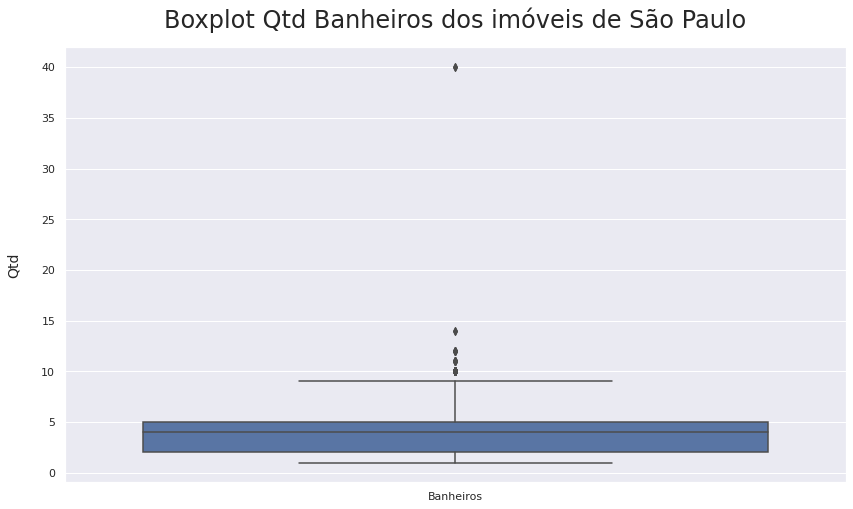

In [ ]:
gera_simples_box_plot(dados_vendas[['Banheiros']], 
                      'Boxplot Qtd Banheiros dos imóveis de São Paulo', '','Qtd')

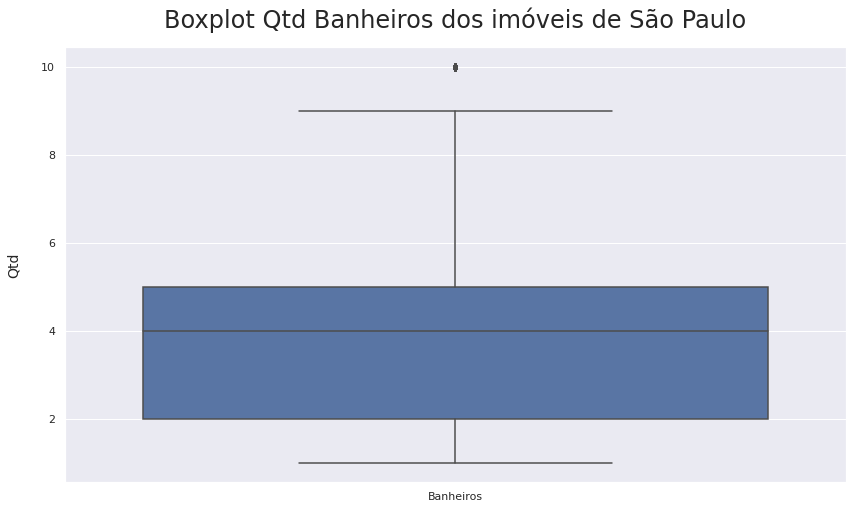

In [ ]:
gera_simples_box_plot(dados_vendas[['Banheiros']].query('Banheiros < 11'), 
                      'Boxplot Qtd Banheiros dos imóveis de São Paulo', '','Qtd')

Função describe, boxplot

- Banheiros: 75% dos dados estão abaixo da margem de 05 banheiros. Existem alguns imóveis com a quantidade entre 10 e 14, e um imóvel com 40 desses, sendo necessário uma investigação mais profunda (por ora, iremos retirar da base, os imóveis com 11 ou mais banheiros).

In [ ]:
# registros que serão retirados
dados_vendas.query('Banheiros >= 11')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
937,Rua Bandeirante Sampaio Soares,Vila Morumbi,São Paulo,850,6,11,4,R$ 10.000.000,R$,10.000.000,None,10000000.00,11764.71
1203,Avenida Piassanguaba,Planalto Paulista,São Paulo,1040,6,12,10,R$ 3.000.000,R$,3.000.000,None,3000000.00,2884.62
1589,Rua Sílvio Portugal,Pacaembu,São Paulo,950,9,12,6,R$ 3.200.000,R$,3.200.000,None,3200000.00,3368.42
1839,NaN,Morumbi,São Paulo,1200,6,11,6,R$ 9.500.000,R$,9.500.000,None,9500000.00,7916.67
1933,NaN,Morumbi,São Paulo,1205,6,11,6,R$ 9.500.000,R$,9.500.000,None,9500000.00,7883.82
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000,R$,2.600.000,None,2600000.00,5327.87
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000,R$,2.600.000,None,2600000.00,5273.83
2364,NaN,Fazenda Morumbi,São Paulo,961,4,12,9,R$ 6.500.000,R$,6.500.000,None,6500000.00,6763.79
2366,NaN,Alto de Pinheiros,São Paulo,722,4,11,10,R$ 6.200.000,R$,6.200.000,None,6200000.00,8587.26
2508,NaN,Retiro Morumbi,São Paulo,2100,7,14,12,R$ 19.800.000,R$,19.800.000,None,19800000.00,9428.57


In [ ]:
dados_vendas['Vagas'].sort_values(ascending = False)

4969    50
5450    50
1586    38
1598    30
1691    26
        ..
8287     1
458      1
5436     1
5429     1
5985     1
Name: Vagas, Length: 9156, dtype: int64

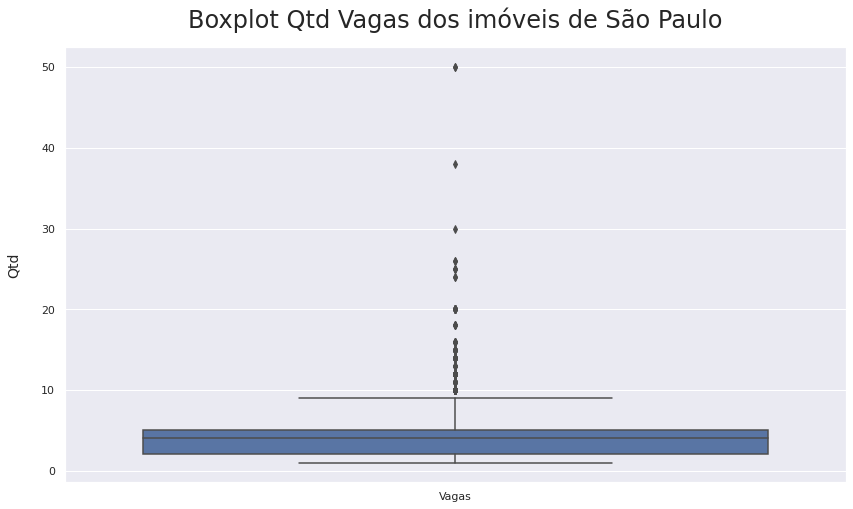

In [ ]:
gera_simples_box_plot(dados_vendas[['Vagas']], 
                      'Boxplot Qtd Vagas dos imóveis de São Paulo', '','Qtd')

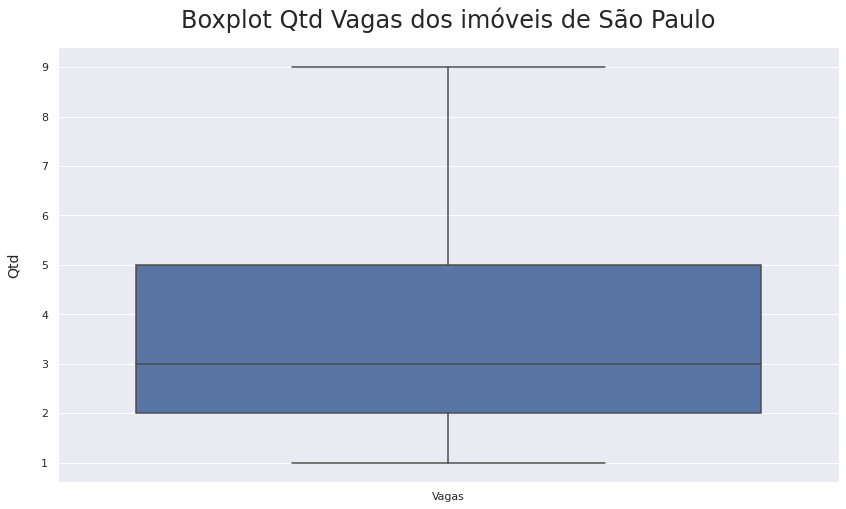

In [ ]:
gera_simples_box_plot(dados_vendas[['Vagas']].query('Vagas < 10'), 
                      'Boxplot Qtd Vagas dos imóveis de São Paulo', '','Qtd')

Função describe, boxplot

- Vagas: 75% dos dados estão abaixo da margem de 5 Vagas. Existem alguns imóveis com a quantidade entre 10 e 20, e imóveis com mais de 20 desses, sendo necessário uma investigação mais profunda (por ora, iremos retirar da base, os imóveis com 10 ou mais banheiros).

In [ ]:
# registros que serão retirados
dados_vendas.query('Vagas >= 10')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
102,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,R$ 37.000.000,R$,37.000.000,None,37000000.00,48941.80
230,Rua Doutor Fausto de Almeida Prado Penteado,Jardim Sílvia (Zona Oeste),São Paulo,1643,4,5,10,R$ 4.500.000,R$,4.500.000,None,4500000.00,2738.89
260,Rua dos Franceses,Morro dos Ingleses,São Paulo,1039,6,7,20,R$ 22.000.000,R$,22.000.000,None,22000000.00,21174.21
284,Rua Kansas,Brooklin Paulista,São Paulo,200,3,1,10,R$ 2.240.000,R$,2.240.000,None,2240000.00,11200.00
322,Rua Doutor Fausto de Almeida Prado Penteado,Jardim Sílvia (Zona Oeste),São Paulo,1643,4,5,10,R$ 3.800.000,R$,3.800.000,None,3800000.00,2312.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9803,Rua També,Jardim Guedala,São Paulo,549,4,9,10,R$ 8.000.000,R$,8.000.000,None,8000000.00,14571.95
9808,NaN,Parque Edu Chaves,São Paulo,352,3,2,10,R$ 899.900,R$,899.900,None,899900.00,2556.53
9850,"Rua Doutor Sarmento, 22",Jardim Luzitânia,São Paulo,1050,5,7,10,R$ 20.000.000,R$,20.000.000,None,20000000.00,19047.62
9868,"Rua Guaonés, 1",Jardim Guedala,São Paulo,965,4,8,10,R$ 4.750.000,R$,4.750.000,None,4750000.00,4922.28


In [ ]:
dados_vendas['Valor_anuncio_float'].sort_values(ascending = False)

400    65000000.00
1530   65000000.00
6882   65000000.00
6131   55000000.00
3542   45825000.00
           ...    
1596     147288.00
2194     147288.00
48       130000.00
11        15000.00
60        13000.00
Name: Valor_anuncio_float, Length: 9156, dtype: float64

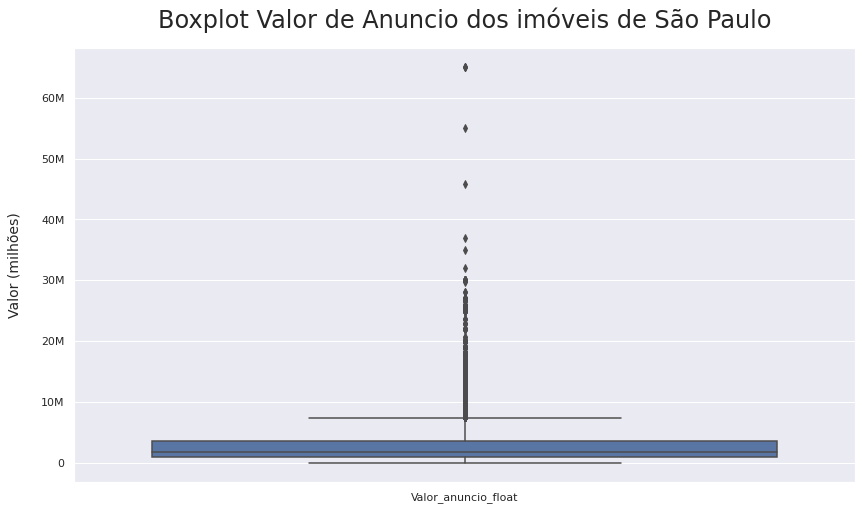

In [ ]:
gera_simples_box_plot(dados_vendas[['Valor_anuncio_float']], 
                      'Boxplot Valor de Anuncio dos imóveis de São Paulo', '','Valor (milhões)')

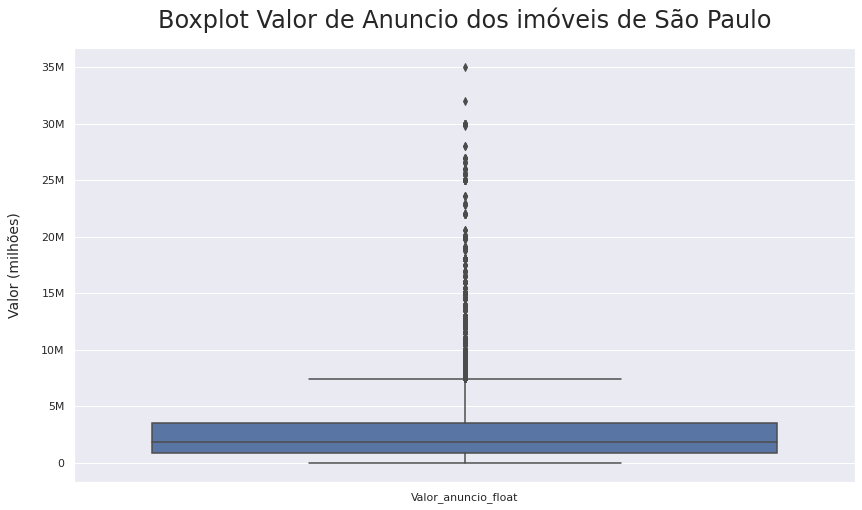

In [ ]:
gera_simples_box_plot(dados_vendas[['Valor_anuncio_float']].query('Valor_anuncio_float <= 35000000'), 
                      'Boxplot Valor de Anuncio dos imóveis de São Paulo', '','Valor (milhões)')

Função describe, boxplot

- Valor do anuncio: 75% dos dados estão abaixo da margem de 35 milhões. Existem alguns imóveis com valor entre 35 e 40 milhões, e imóveis com mais de 40 milhões, sendo necessário uma investigação mais profunda (por ora, iremos retirar da base, os imóveis com valor acima de 35 milhões).

In [ ]:
# filtrando apenas os dados que atendam as condicionais, retirando parte dos outliers
dados_vendas_clean = dados_vendas.query('Metragem < 3000 and Quartos < 8 and Banheiros < 11 and Vagas < 10 and Valor_anuncio_float <= 35000000').copy()
dados_vendas_clean.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00


In [ ]:
dados_vendas_clean.shape

(8719, 13)

In [ ]:
dados_vendas_clean.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
count,8719.00,8719.00,8719.00,8719.00,8719.00,8719.00
mean,322.62,3.38,3.68,3.61,2794862.88,7890.87
std,214.13,0.94,1.80,1.83,3353257.57,5062.62
min,10.00,1.00,1.00,1.00,13000.00,34.40
25%,163.00,3.00,2.00,2.00,850000.00,4731.94
50%,264.00,3.00,4.00,3.00,1700000.00,6478.93
75%,420.00,4.00,5.00,5.00,3400000.00,9310.34
max,1822.00,7.00,10.00,9.00,35000000.00,80000.00


In [ ]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
count,9156.00,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96,8004.07
std,7856.42,1.05,1.97,2.60,3944208.19,5291.32
min,10.00,1.00,1.00,1.00,13000.00,9.33
25%,168.00,3.00,2.00,2.00,890000.00,4750.00
50%,276.00,3.00,4.00,4.00,1800000.00,6500.00
75%,450.00,4.00,5.00,5.00,3500000.00,9453.78
max,750000.00,16.00,40.00,50.00,65000000.00,80000.00


Confrontando o resultado obtido na observação dos dados, não pude verificar uma diferença relevante nas medidas descritivas, possivelmente ainda existam muitos casos que estejam alterando o padrão.

## 3. Agrupar por mais de uma categoria e realizar as análises

In [ ]:
# filtrando os 20 maiores valores dos anuncios
top_vinte_valor_anuncio = dados_vendas_clean['Valor_anuncio_float'].sort_values(ascending = False)[:20]
top_vinte_valor_anuncio

2906   35000000.00
2238   30000000.00
8894   30000000.00
2319   30000000.00
108    30000000.00
4643   30000000.00
573    30000000.00
2132   30000000.00
3551   30000000.00
4085   30000000.00
5460   30000000.00
4978   30000000.00
5269   29780000.00
3300   27000000.00
738    27000000.00
9428   27000000.00
2321   27000000.00
195    26600000.00
730    26500000.00
665    26000000.00
Name: Valor_anuncio_float, dtype: float64

In [ ]:
dados_vendas_clean.query('Valor_anuncio_float in @top_vinte_valor_anuncio')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
108,NaN,Jardim Paulista,São Paulo,1060,5,5,4,R$ 30.000.000,R$,30.000.000,None,30000000.00,28301.89
195,Rua Itália,Jardim Europa,São Paulo,713,5,7,6,R$ 26.600.000,R$,26.600.000,None,26600000.00,37307.15
573,NaN,Jardim Paulista,São Paulo,1060,5,3,4,R$ 30.000.000,R$,30.000.000,None,30000000.00,28301.89
662,Rua Panamá,Jardim América,São Paulo,950,4,4,6,R$ 26.000.000,R$,26.000.000,None,26000000.00,27368.42
665,Rua Panamá,Jardim América,São Paulo,955,4,4,6,R$ 26.000.000,R$,26.000.000,None,26000000.00,27225.13
730,NaN,Cidade Jardim,São Paulo,1057,5,7,7,R$ 26.500.000,R$,26.500.000,None,26500000.00,25070.96
738,Rua Canadá,Jardim América,São Paulo,675,4,5,6,R$ 27.000.000,R$,27.000.000,None,27000000.00,40000.00
2132,NaN,Jardim Paulista,São Paulo,1060,5,6,4,R$ 30.000.000,R$,30.000.000,None,30000000.00,28301.89
2238,NaN,Jardim Paulista,São Paulo,1065,5,6,4,R$ 30.000.000,R$,30.000.000,None,30000000.00,28169.01
2319,NaN,Jardim América,São Paulo,1000,5,8,8,R$ 30.000.000,R$,30.000.000,None,30000000.00,30000.00


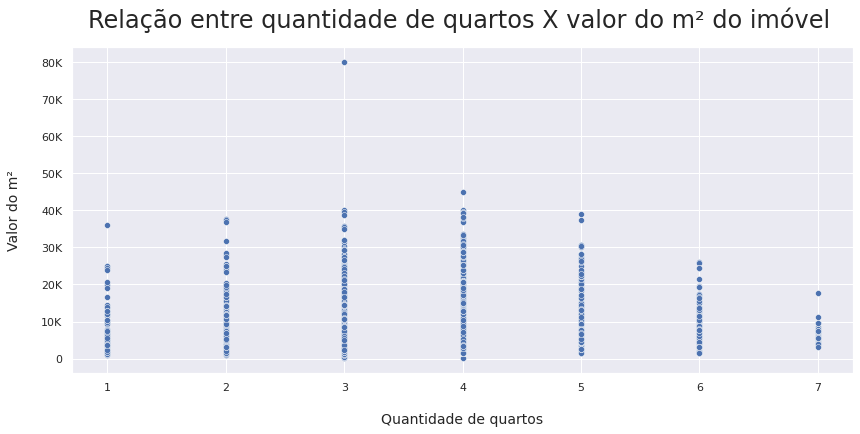

In [ ]:
plt.figure(figsize = (14, 6))
ax =sns.scatterplot(data = dados_vendas_clean, y = 'Valor_m2', x = 'Quartos')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

plt.title('Relação entre quantidade de quartos X valor do m² do imóvel ', pad = 20, fontsize = 24)
plt.xlabel('Quantidade de quartos', labelpad = 20, fontsize = 14)
plt.ylabel('Valor do m²', labelpad = 20, fontsize = 14)

plt.show()

Não vejo uma relação relevante entre a quantidade de quartos e o valor do m². Imóveis com 07 quartos, diferentemente do que poderiamos imaginar, possuem valores do m² menores que de 01 quarto.

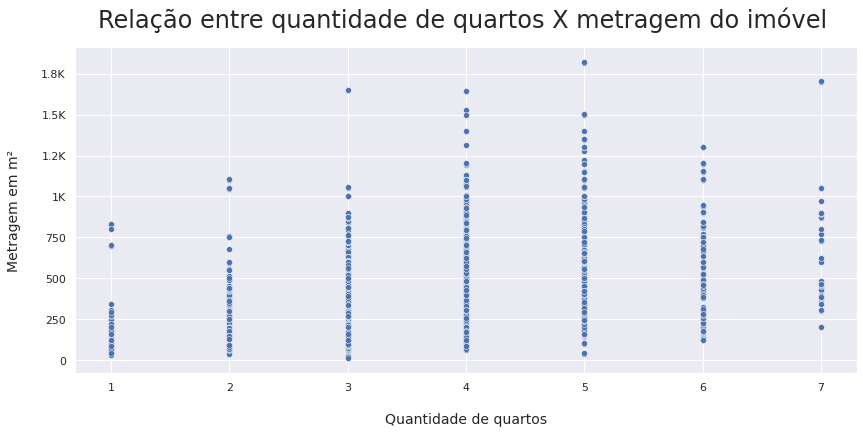

In [ ]:
plt.figure(figsize = (14, 6))
ax = sns.scatterplot(data = dados_vendas_clean, x = 'Quartos', y = 'Metragem')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

plt.title('Relação entre quantidade de quartos X metragem do imóvel ', pad = 20, fontsize = 24)
plt.xlabel('Quantidade de quartos', labelpad = 20, fontsize = 14)
plt.ylabel('Metragem em m²', labelpad = 20, fontsize = 14)

plt.show()

Não vejo uma relação relevante entre a quantidade de quartos e a metragem do imóvel. Maior metragem estão mais concentrados nos imóveis que possuem 04 e 05 quartos. Cruzando as variáveis, identificamos imóveis em torno de 750 m² com apenas um quarto.

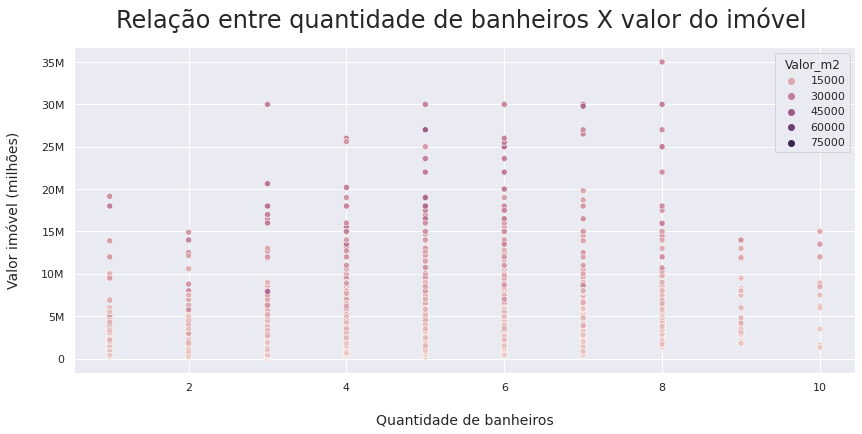

In [ ]:
plt.figure(figsize = (14, 6))
ax = sns.scatterplot(data = dados_vendas_clean, x = 'Banheiros', y = 'Valor_anuncio_float', hue = 'Valor_m2')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

plt.title('Relação entre quantidade de banheiros X valor do imóvel ', pad = 20, fontsize = 24)
plt.xlabel('Quantidade de banheiros', labelpad = 20, fontsize = 14)
plt.ylabel('Valor imóvel (milhões)', labelpad = 20, fontsize = 14)

plt.show()

Os dados ainda parecem bastante aleatorios, a quantidade de banheiros parece não influenciar diretamente no valor do imóvel nem no valor por m², indo na contramão do que pensamos, quantos mais banheiros, maior área, maior área, maior valor do imóvel.

## 4. Organize o colab para deixar com cara de projeto

# **Aula 04**

---

Aula 04 - Missão Impossivel: Cruzando bases de Dados

---

### **Base de endereços**

In [ ]:
ibge_sp = pd.read_csv(
    'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
    encoding='ISO-8859-1',
    sep=';', thousands='.', decimal=','
)
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [ ]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [ ]:
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95


In [ ]:
enderecos = pd.read_csv("/content/drive/MyDrive/MyDrive/enderecos.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
enderecos.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


In [ ]:
enderecos['sigla_uf'].value_counts()

SP    298124
MG    100601
RJ     96596
GO     59679
PR     57930
BA     54399
RS     53370
PE     49733
SC     46582
ES     36221
DF     36099
CE     29707
PA     24365
MT     18627
AM     15861
MA     14837
RN     14670
MS     14571
PB     13692
PI     13080
AL     11033
RO     10832
TO      8225
SE      5638
AC      4021
AP      2702
RR      2593
Name: sigla_uf, dtype: int64

In [ ]:
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35
...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.00,-22.93,-47.27
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.00,-21.24,-47.83
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.00,-21.20,-47.74
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.00,-23.19,-47.08


In [ ]:
dados_enderecos_sp = enderecos.query('sigla_uf == "SP"')
dados_enderecos_sp

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35
...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.00,-22.93,-47.27
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.00,-21.24,-47.83
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.00,-21.20,-47.74
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.00,-23.19,-47.08


In [ ]:
# concatenando os valores das colunas para formar o nome da rua
dados_enderecos_sp['tipo_logr'] + ' ' + dados_enderecos_sp['logr_nome']

1           Rua João Antônio Vasconcelos
413269                             Rua A
413270                             Rua A
413271                             Rua A
413272                  Rua João Bandini
                       ...              
1113858              Rua Daniel Buccieri
1113865               Rua Ottorino Rizzi
1113873    Rua Adriano Michelutti Cândia
1113882            Rodovia Mario Tonolli
1113884                   Rua Tiradentes
Length: 298124, dtype: object

In [ ]:
dados_enderecos_sp['rua'] = dados_enderecos_sp['tipo_logr'] + ' ' + dados_enderecos_sp['logr_nome']
# deixando os nomes em minusculos e tirando quaisquer espaços em branco que poderiam atrapalhar 
dados_enderecos_sp['rua'] = dados_enderecos_sp['rua'].str.lower().str.strip()
dados_enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


In [ ]:
dados_vendas['Rua'].str.extract(r'(^[\w ]+)')[:10]

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


In [ ]:
dados_vendas.shape

(9156, 13)

In [ ]:
dados_vendas['apenas_rua'] = dados_vendas['Rua'].str.extract(r'(^[\w ]+)')
dados_vendas['apenas_rua'] = dados_vendas['apenas_rua'].str.lower().str.strip()
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto


### **Merge das bases endereços_sp  e dados_vendas: base final dados_geo**





In [ ]:
# aplicando merge para aglutinar as bases necessárias, parametros importantes que irão fazer a ponte entre uma base de dados e outra
## lembrando que estamos utilizando as colunas apenas_rua e rua para criar esse link
### para que não duplique os dados, necessário realizar o drop_duplicates, baseado nos registros da base de dados dados_vendas
dados_geo = pd.merge(left = dados_vendas, 
                     right = dados_enderecos_sp[['rua', 'cep', 'latitude', 'longitude']], 
                     how = 'left', 
                     left_on = 'apenas_rua', 
                     right_on = 'rua').drop_duplicates(subset = dados_vendas.columns).query('cep > 0')
print(dados_geo.shape)
dados_geo.head()                     

(8520, 18)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2,apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 40.7 MB/s 
     |████████████████████████████████| 6.3 MB 39.1 MB/s 


In [ ]:
import geopandas as gpd # importando o geopandas

In [ ]:
setor_censo = gpd.read_file('/content/drive/MyDrive/MyDrive/35SEE250GC_SIR.shp')
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [ ]:
from shapely.geometry import Point, Polygon

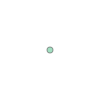

In [ ]:
latitude = -23.56
longitude = -46.59
Point(longitude, latitude)

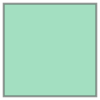

In [ ]:
Polygon([[0, 0],[1, 0], [1, 1], [0, 1], [0, 0]])

In [ ]:
Polygon([[0, 0],[1, 0], [1, 1], [0, 1], [0, 0]]).contains(Point(0.1, 0.9))

True

In [ ]:
setor_censo_sp = setor_censo.query('NM_MUNICIP == "SÃO PAULO"')
setor_censo_sp[setor_censo_sp.contains(Point(longitude, latitude))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
54041,119535.00,355030853000029,URBANO,35503085300,None,355030853,MOOCA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,54042,"POLYGON ((-46.59147 -23.56009, -46.59102 -23.5..."


In [ ]:
dados_geo = pd.read_csv('/content/drive/MyDrive/MyDrive/dados_geo.csv')
dados_geo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00


### **Base de dados IBGE**

In [ ]:
# base de dados do IBGE
ibge_url = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'
dados_ibge = pd.read_csv(ibge_url, sep = ';', encoding='ISO-8859-1', thousands='.', decimal=',', engine='python')

dados_ibge.dropna(how = 'all', axis = 1, inplace = True)

**Dicionario de dados dataset IBGE**

- Cod_setor

- Cod_Grandes Regiões: Código das Grandes Regiões (Regiões Geográficas)

- Nome_Grande Região: Nome das Grandes Regiões (Regiões Geográficas)

- Cod_UF: Código da Unidade da Federação

- Nome_da_UF: Nome da Unidade da Federação

- Cod_meso Código da mesorregião

- Nome_da_meso: Nome da mesorregião

- Cod_micro: Código da microrregião

- Nome_da_micro: Nome da microrregião

- Cod_RM: Código da região metropolitana ou RIDE

- Nome_da_RM: Nome da região metropolitana ou RIDE

- Cod_municipio: Código do município

- Nome_municipio: Nome do município

- Cod_distrito: Código do distrito

- Nome_do_distrito: Nome do distrito

- Cod_subdistrito: Código do subdistrito

- Nome_do_subdistrito: Nome do subdistrito

- Cod_bairro: Código de bairro

- Nome_do_bairro: Nome do bairro

- Situação_setor: Código de situação do setor
  - Situação urbana – códigos: 1, 2 e 3
    - 1- Área urbanizada de cidade ou vila
    - 2- Área não-urbanizada de cidade ou vila
    - 3- Área urbana isolada
  - Situação rural – códigos: 4, 5, 6, 7 e 8
    - 4- Aglomerado rural de extensão urbana
    - 5- Aglomerado rural isolado – povoado
    - 6- Aglomerado rural isolado – núcleo
    - 7- Aglomerado rural isolado - outros aglomerados
    - 8- Zona rural, exclusive aglomerado rural

- V001: Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes

- V002: Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes

- V003: Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1)

- V004: Variância do número de moradores em domicílios particulares permanentes

- V005: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)

- V006: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)

- V007: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)

- V008: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)

- V009: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)

- V010: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)

- V011: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)

- V012: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento)

In [ ]:
pd.set_option('display.max_columns', 34)

In [ ]:
dados_ibge.shape

(18363, 33)

In [ ]:
dados_ibge.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,RM Sï¿½o Paulo,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),1,0,266.00,800.00,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,RM Sï¿½o Paulo,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),1,0,306.00,913.00,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,RM Sï¿½o Paulo,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),1,0,189.00,625.00,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,RM Sï¿½o Paulo,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),1,0,181.00,572.00,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,RM Sï¿½o Paulo,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),1,0,240.00,754.00,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [ ]:
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [ ]:
dados_ibge.columns

Index(['Cod_setor', 'Cod_Grandes Regiï¿½es', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio',
       'Cod_distrito', 'Nome_do_distrito', 'Cod_subdistrito',
       'Nome_do_subdistrito', 'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor',
       'Tipo_setor', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007',
       'V008', 'V009', 'V010', 'V011', 'V012'],
      dtype='object')

In [ ]:
# verificando a qtd de valores únicos por coluna
## coluna que retorna apenas 1 valor, não possui relevância na análise
### manteremos as colunas com os nomes e droparemos os seus respectivos códigos
for d in dados_ibge:
  print(dados_ibge[d].value_counts().sort_index())

355030801000001    1
355030801000002    1
355030801000003    1
355030801000004    1
355030801000005    1
                  ..
355030896000243    1
355030896000244    1
355030896000245    1
355030896000246    1
355030896000247    1
Name: Cod_setor, Length: 18363, dtype: int64
3    18363
Name: Cod_Grandes Regiï¿½es, dtype: int64
Regiï¿½o Sudeste    18363
Name: Nome_Grande_Regiao, dtype: int64
35    18363
Name: Cod_UF, dtype: int64
Sï¿½o Paulo    18363
Name: Nome_da_UF , dtype: int64
3515    18363
Name: Cod_meso, dtype: int64
Metropolitana de Sï¿½o Paulo    18363
Name: Nome_da_meso, dtype: int64
35061    18363
Name: Cod_micro, dtype: int64
Sï¿½o Paulo    18363
Name: Nome_da_micro, dtype: int64
20    18363
Name: Cod_RM, dtype: int64
RM Sï¿½o Paulo    18363
Name: Nome_da_RM, dtype: int64
3550308    18363
Name: Cod_municipio, dtype: int64
Sï¿½O PAULO    18363
Name: Nome_do_municipio, dtype: int64
355030801    130
355030802     78
355030803    107
355030804    124
355030805    149
           

In [ ]:
# verificando se os valores da coluna Nome_do_distrito são iguais à coluna Nome_do_subdistrito
## positivo, podemos retirar uma delas
dados_ibge['Nome_do_distrito'].equals(dados_ibge['Nome_do_subdistrito'])

True

In [ ]:
dados_ibge_clean = dados_ibge.drop(columns = [
                           'Cod_Grandes Regiï¿½es', 
                           'Cod_UF', 
                           'Cod_meso', 
                           'Cod_micro', 
                           'Cod_RM', 
                           'Cod_municipio', 
                           'Cod_distrito', 
                           'Cod_subdistrito', 
                           'Cod_bairro', 
                           'Nome_do_municipio',
                           'Nome_Grande_Regiao', 
                           'Nome_da_UF ', 
                           'Nome_da_meso', 
                           'Nome_da_micro', 
                           'Nome_da_RM', 
                           'Nome_do_bairro', 
                           'Nome_do_subdistrito'])

In [ ]:
dados_ibge_clean.head()

,Cod_setor,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,ï¿½GUA RASA,1,0,266.00,800.00,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,ï¿½GUA RASA,1,0,306.00,913.00,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,ï¿½GUA RASA,1,0,189.00,625.00,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,ï¿½GUA RASA,1,0,181.00,572.00,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,ï¿½GUA RASA,1,0,240.00,754.00,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [ ]:
dados_ibge_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cod_setor         18363 non-null  int64  
 1   Nome_do_distrito  18363 non-null  object 
 2   Situacao_setor    18363 non-null  int64  
 3   Tipo_setor        18363 non-null  int64  
 4   V001              18333 non-null  float64
 5   V002              18333 non-null  float64
 6   V003              18333 non-null  float64
 7   V004              18333 non-null  float64
 8   V005              18333 non-null  float64
 9   V006              18333 non-null  float64
 10  V007              18324 non-null  float64
 11  V008              18324 non-null  float64
 12  V009              18363 non-null  float64
 13  V010              18363 non-null  float64
 14  V011              18352 non-null  float64
 15  V012              18352 non-null  float64
dtypes: float64(12), int64(3), object(1)
memo

### **Marge das bases de dados_geo e dados_ibge_clean : base final dados_vendas_censo**

In [ ]:
dados_vendas_censo = pd.merge(left = dados_geo, 
                              right = dados_ibge_clean, 
                              how = 'left', 
                              left_on = 'setor_censo', right_on = 'Cod_setor')

In [ ]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rua               5605 non-null   object 
 1   Bairro            5597 non-null   object 
 2   Cidade            5605 non-null   object 
 3   Metragem          5605 non-null   int64  
 4   Quartos           5605 non-null   int64  
 5   Banheiros         5605 non-null   int64  
 6   Vagas             5605 non-null   int64  
 7   Valor             5605 non-null   object 
 8   Valor_anuncio     5605 non-null   float64
 9   Tipo_anuncio      0 non-null      float64
 10  Valor_mm          5605 non-null   float64
 11  Valor_m2          5605 non-null   float64
 12  rua               5605 non-null   object 
 13  cep               5605 non-null   float64
 14  latitude          5605 non-null   float64
 15  longitude         5605 non-null   float64
 16  Point             5605 non-null   object 


In [ ]:
# gerando csv com as bases unidas 
## dados_vendas_censo.to_csv('/content/drive/MyDrive/Colab Notebooks/imersao_dados_alura/dados_vendas_censo.csv', encoding='utf-8')

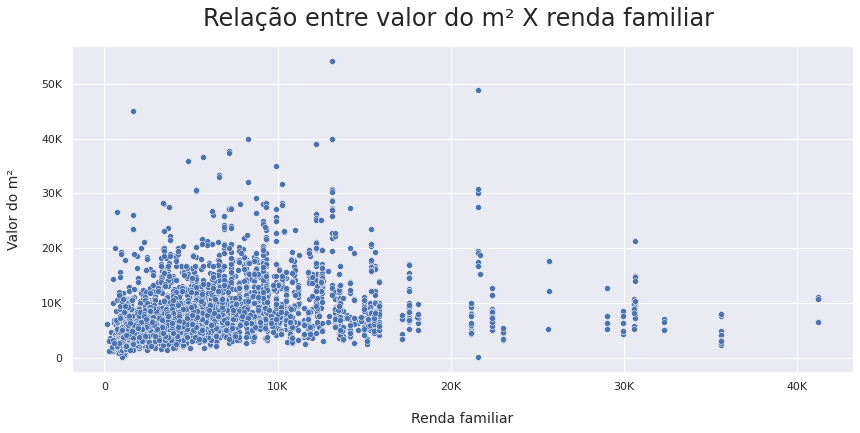

In [ ]:
plt.figure(figsize = (14, 6))
ax = sns.scatterplot(data = dados_vendas_censo, x = 'V005', y = 'Valor_m2')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

plt.title('Relação entre valor do m² X renda familiar ', pad = 20, fontsize = 24)
plt.xlabel('Renda familiar', labelpad = 20, fontsize = 14)
plt.ylabel('Valor do m²', labelpad = 20, fontsize = 14)

plt.show()

# **Desafios Aula 04**

## 1.  **Realizar uma análise dos dados do IBGE por mapa, analisando a distribuição de renda: [Post no medium criado pela equipe Creditas, para inspiração]**(https://medium.com/creditas-tech/dados-georreferenciados-explora%C3%A7%C3%A3o-e-visualiza%C3%A7%C3%A3o-com-python-edd51e7c53da);

In [ ]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rua               5605 non-null   object 
 1   Bairro            5597 non-null   object 
 2   Cidade            5605 non-null   object 
 3   Metragem          5605 non-null   int64  
 4   Quartos           5605 non-null   int64  
 5   Banheiros         5605 non-null   int64  
 6   Vagas             5605 non-null   int64  
 7   Valor             5605 non-null   object 
 8   Valor_anuncio     5605 non-null   float64
 9   Tipo_anuncio      0 non-null      float64
 10  Valor_mm          5605 non-null   float64
 11  Valor_m2          5605 non-null   float64
 12  rua               5605 non-null   object 
 13  cep               5605 non-null   float64
 14  latitude          5605 non-null   float64
 15  longitude         5605 non-null   float64
 16  Point             5605 non-null   object 


In [ ]:
from folium import Choropleth, Marker
from folium.plugins import MarkerCluster

import folium


In [ ]:
center = [-23.5489, -46.6388]
# criando o mapa
m_stamem = folium.Map(location=center, 
                 width=500,height=500,
                 tiles='Stamen Toner', zoom_start=12)

m_stamem

In [ ]:
m_rua = folium.Map(location=center, 
                 width=500,height=500,
                 tiles='OpenStreetMap', zoom_start=12)

m_rua

In [ ]:
dados_vendas_censo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo,Cod_setor,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00,355030877000067.00,SAï¿½DE,1.00,0.00,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00,355030871000023.00,SANTO AMARO,1.00,0.00,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00,355030830000050.00,GRAJAï¿½,1.00,0.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00,355030808000050.00,BELï¿½M,1.00,0.00,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00,355030865000169.00,RAPOSO TAVARES,1.00,0.00,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46


## 2. **Repassar a aula para entender melhor o que foi realizado**

- V001: Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes

- V002: Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes

- V003: Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1)

- V004: Variância do número de moradores em domicílios particulares permanentes

- V005: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)

- V006: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)

- V007: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)

- V008: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)

- V009: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)

- V010: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)

- V011: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)

- V012: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento)

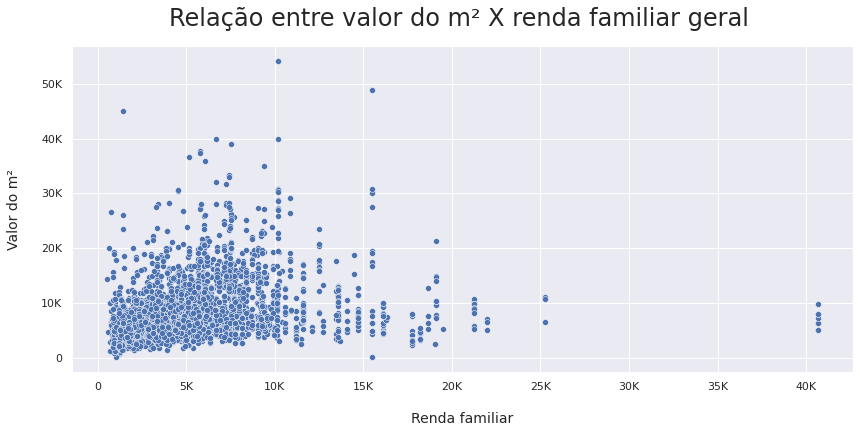

In [ ]:
plt.figure(figsize = (14, 6))
ax = sns.scatterplot(data = dados_vendas_censo, x = 'V011', y = 'Valor_m2')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

plt.title('Relação entre valor do m² X renda familiar geral ', pad = 20, fontsize = 24)
plt.xlabel('Renda familiar', labelpad = 20, fontsize = 14)
plt.ylabel('Valor do m²', labelpad = 20, fontsize = 14)

plt.show()

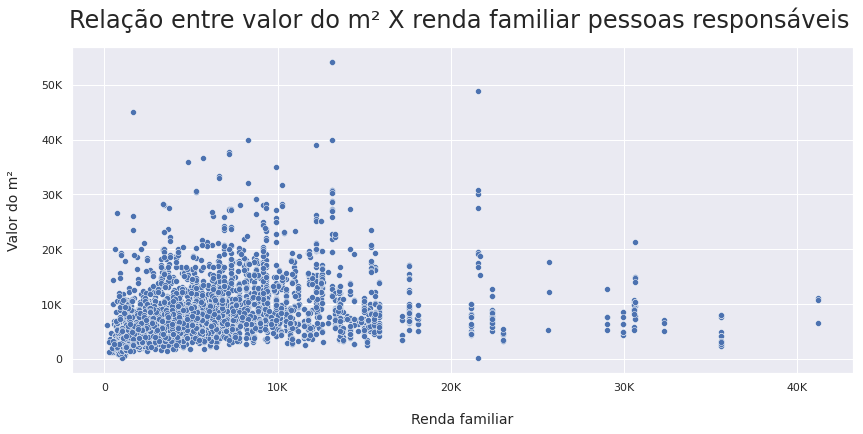

In [ ]:
plt.figure(figsize = (14, 6))
ax = sns.scatterplot(data = dados_vendas_censo, x = 'V005', y = 'Valor_m2')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

plt.title('Relação entre valor do m² X renda familiar pessoas responsáveis ', pad = 20, fontsize = 24)
plt.xlabel('Renda familiar', labelpad = 20, fontsize = 14)
plt.ylabel('Valor do m²', labelpad = 20, fontsize = 14)

plt.show()

Não consigo identificar uma relação clara entre renda familiar considerando apenas os responsáveis pela família ou renda familiar considerando todos com idade maior que 10 anos, com o valor do m², os dados estão bem dispersos.

In [ ]:
dados_vendas_censo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo,Cod_setor,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00,355030877000067.00,SAï¿½DE,1.00,0.00,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00,355030871000023.00,SANTO AMARO,1.00,0.00,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00,355030830000050.00,GRAJAï¿½,1.00,0.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00,355030808000050.00,BELï¿½M,1.00,0.00,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00,355030865000169.00,RAPOSO TAVARES,1.00,0.00,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46


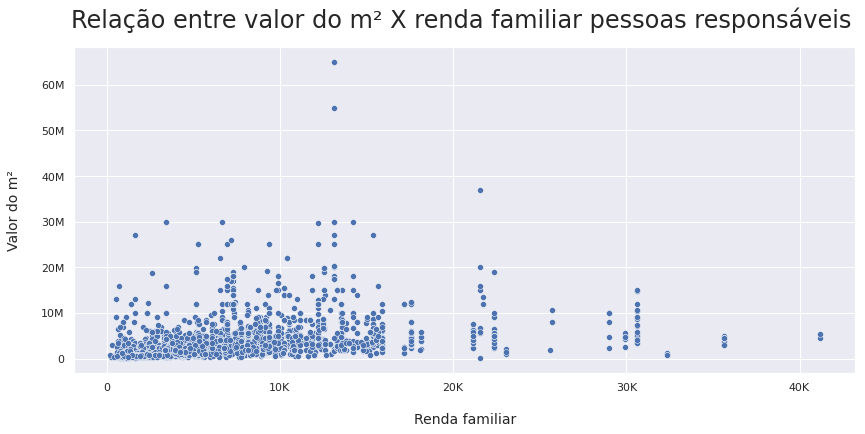

In [ ]:
plt.figure(figsize = (14, 6))
ax = sns.scatterplot(data = dados_vendas_censo, x = 'V005', y = 'Valor_anuncio')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

plt.title('Relação entre valor do m² X renda familiar pessoas responsáveis ', pad = 20, fontsize = 24)
plt.xlabel('Renda familiar', labelpad = 20, fontsize = 14)
plt.ylabel('Valor do m²', labelpad = 20, fontsize = 14)

plt.show()

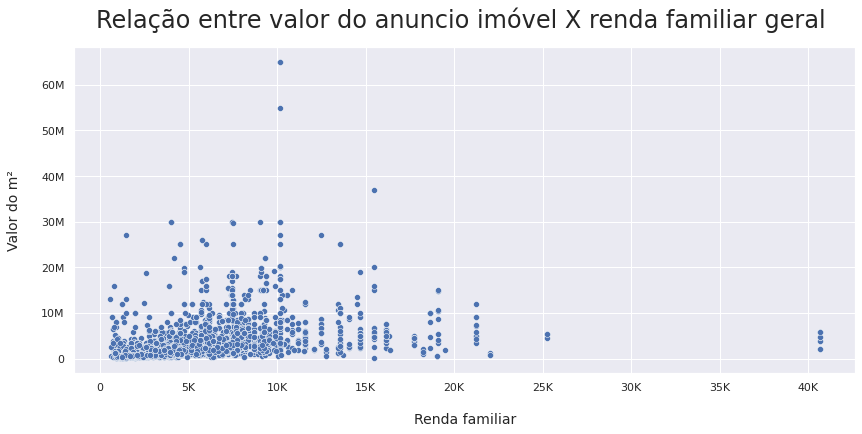

In [ ]:
plt.figure(figsize = (14, 6))
ax = sns.scatterplot(data = dados_vendas_censo, x = 'V011', y = 'Valor_anuncio')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

plt.title('Relação entre valor do anuncio imóvel X renda familiar geral ', pad = 20, fontsize = 24)
plt.xlabel('Renda familiar', labelpad = 20, fontsize = 14)
plt.ylabel('Valor do m²', labelpad = 20, fontsize = 14)

plt.show()

Os gráficos relacionando renda familiar considerando apenas os responsáveis pela família ou renda familiar considerando todos com idade maior que 10 anos, com o valor do anuncio do imóvel, mostram dados muitos dispersos. Hipótese que ainda tenha dados distorcendo as informações.

In [ ]:
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo,Cod_setor,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00,355030877000067.00,SAï¿½DE,1.00,0.00,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00,355030871000023.00,SANTO AMARO,1.00,0.00,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00,355030830000050.00,GRAJAï¿½,1.00,0.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00,355030808000050.00,BELï¿½M,1.00,0.00,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00,355030865000169.00,RAPOSO TAVARES,1.00,0.00,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.00,NaN,1.50,5617.98,Avenida Odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099.00,355030877000099.00,SAï¿½DE,1.00,0.00,256.00,720.00,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.00,NaN,0.67,7000.00,Rua Tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087.00,355030816000087.00,CAMPO GRANDE,1.00,0.00,150.00,448.00,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5602,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2300000.00,NaN,2.30,3801.65,Rua Guararema,4136030.00,-23.41,-46.04,POINT (-46.0373872 -23.411688),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.00,NaN,1.05,5121.95,Rua Estero Belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052.00,355030877000052.00,SAï¿½DE,1.00,0.00,400.00,1099.00,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


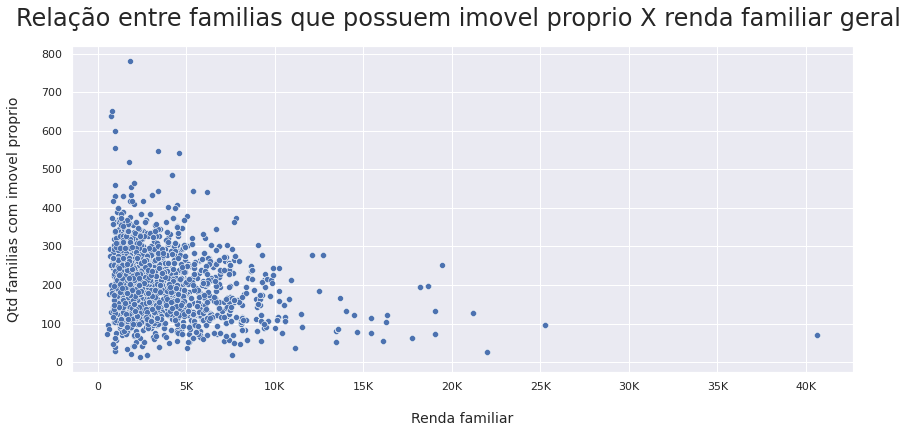

In [ ]:
plt.figure(figsize = (14, 6))
ax = sns.scatterplot(data = dados_vendas_censo, x = 'V011', y = 'V001')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

plt.title('Relação entre familias que possuem imovel proprio X renda familiar geral ', pad = 20, fontsize = 24)
plt.xlabel('Renda familiar', labelpad = 20, fontsize = 14)
plt.ylabel('Qtd familias com imovel proprio', labelpad = 20, fontsize = 14)

plt.show()

Ao meu ponto de vista, visualizamos uma sutil correlação positiva considerando a quantidade de imoveis proprios e a renda familiar (considerando todos os moradores com idade maior que 10 na residencia)

In [ ]:
# variáveis que apresentaram uma correlação relativamente significante com a variável valor_imovel
dados_vendas_censo[['Valor_anuncio', 'Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_m2', 'V005', 'V007', 'V009', 'V011']].corr()

,Valor_anuncio,Metragem,Quartos,Banheiros,Vagas,Valor_m2,V005,V007,V009,V011
Valor_anuncio,1.00,0.30,0.34,0.45,0.50,0.70,0.43,0.42,0.45,0.43
Metragem,0.30,1.00,0.23,0.25,0.28,0.06,0.23,0.23,0.21,0.21
Quartos,0.34,0.23,1.00,0.53,0.40,0.13,0.32,0.33,0.31,0.32
Banheiros,0.45,0.25,0.53,1.00,0.45,0.22,0.41,0.41,0.39,0.40
Vagas,0.50,0.28,0.40,0.45,1.00,0.18,0.35,0.35,0.32,0.33
Valor_m2,0.70,0.06,0.13,0.22,0.18,1.00,0.29,0.28,0.37,0.32
V005,0.43,0.23,0.32,0.41,0.35,0.29,1.00,0.95,0.95,0.90
V007,0.42,0.23,0.33,0.41,0.35,0.28,0.95,1.00,0.92,0.96
V009,0.45,0.21,0.31,0.39,0.32,0.37,0.95,0.92,1.00,0.94
V011,0.43,0.21,0.32,0.40,0.33,0.32,0.90,0.96,0.94,1.00


# **Aula 05**

---

Aula 05 - Machine Learning

---

In [ ]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rua               5605 non-null   object 
 1   Bairro            5597 non-null   object 
 2   Cidade            5605 non-null   object 
 3   Metragem          5605 non-null   int64  
 4   Quartos           5605 non-null   int64  
 5   Banheiros         5605 non-null   int64  
 6   Vagas             5605 non-null   int64  
 7   Valor             5605 non-null   object 
 8   Valor_anuncio     5605 non-null   float64
 9   Tipo_anuncio      0 non-null      float64
 10  Valor_mm          5605 non-null   float64
 11  Valor_m2          5605 non-null   float64
 12  rua               5605 non-null   object 
 13  cep               5605 non-null   float64
 14  latitude          5605 non-null   float64
 15  longitude         5605 non-null   float64
 16  Point             5605 non-null   object 


In [ ]:
dados_vendas_censo.columns

Index(['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor', 'Valor_anuncio', 'Tipo_anuncio', 'Valor_mm', 'Valor_m2', 'rua',
       'cep', 'latitude', 'longitude', 'Point', 'setor_censo', 'Cod_setor',
       'Nome_do_distrito', 'Situacao_setor', 'Tipo_setor', 'V001', 'V002',
       'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011',
       'V012'],
      dtype='object')

In [ ]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

dados_vendas_censo = pd.read_csv("/content/drive/MyDrive/MyDrive/dados_vendas_censo.csv")
# limpando a base de dados retirando as colunas que não serão ncessárias 
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,-23.62,-46.65,1.00,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,-23.64,-46.69,1.00,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,-23.75,-46.70,1.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,-23.55,-46.59,1.00,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,-23.59,-46.76,1.00,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,-23.60,-46.68,1.00,177.00,384.00,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,-23.61,-46.65,1.00,256.00,720.00,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,-23.66,-46.69,1.00,150.00,448.00,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,-23.62,-46.63,1.00,400.00,1099.00,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [ ]:
# as colunas que iremos utilizar
dados_vendas_censo.columns

Index(['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude',
       'Situacao_setor', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006',
       'V007', 'V008', 'V009', 'V010', 'V011', 'V012'],
      dtype='object')

In [ ]:
dados_vendas_censo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,-23.62,-46.65,1.00,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,-23.64,-46.69,1.00,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,-23.75,-46.70,1.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,-23.55,-46.59,1.00,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,-23.59,-46.76,1.00,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46


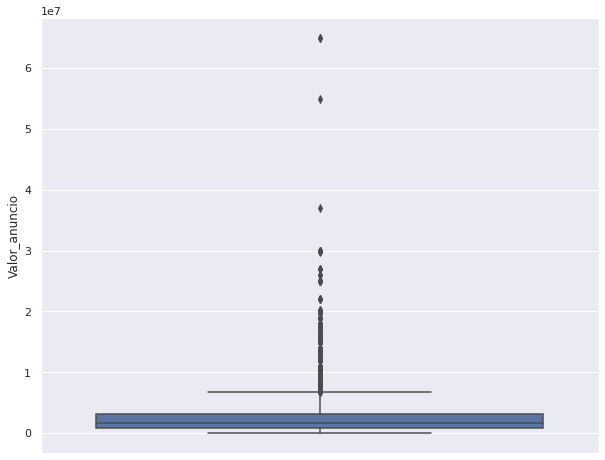

In [ ]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y = 'Valor_anuncio')
plt.show()

In [ ]:
dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00,0.01,65.00,-23.57,-46.68,1.00,115.00,360.00,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
89,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00,37.00,48941.80,-23.57,-46.68,1.00,115.00,360.00,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
1032,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.00,65.00,54166.67,-23.57,-46.66,1.00,116.00,414.00,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3521,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.00,55.00,30286.34,-23.57,-46.67,1.00,116.00,414.00,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3896,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.00,65.00,54166.67,-23.57,-46.67,1.00,116.00,414.00,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57


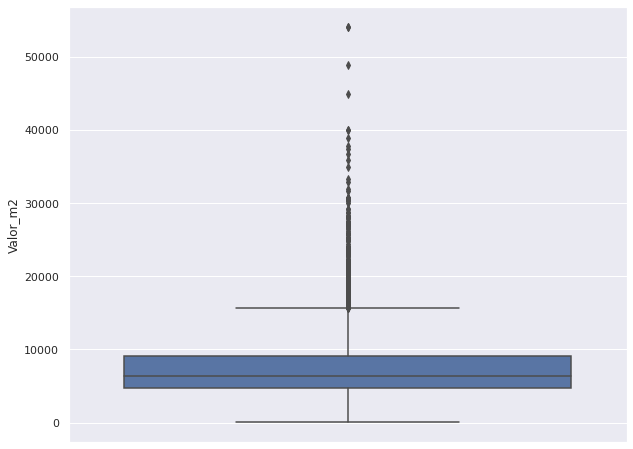

In [ ]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y = 'Valor_m2')
plt.show()

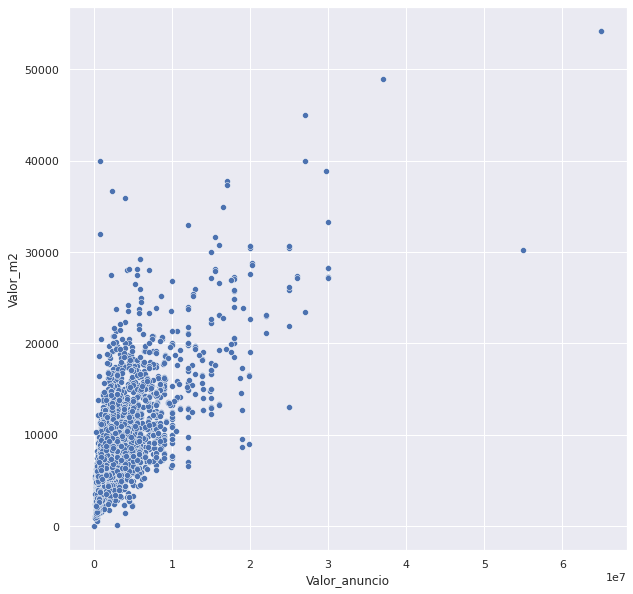

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="Valor_anuncio", y="Valor_m2");

In [ ]:
# mostrando a corelação , quanto mais baixo de 0 menor a correlação , quanto mais perto do 1 maior a corelação
dados_vendas_censo.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.24,0.28,0.29,0.29,0.06,-0.09,-0.13,0.48,-0.13,-0.10,0.13,0.05,0.23,0.07,0.23,0.05,0.21,0.07,0.21,0.05
Quartos,0.23,1.00,0.55,0.41,0.34,0.34,0.12,-0.01,-0.19,-0.01,-0.18,-0.15,0.16,0.07,0.32,0.12,0.33,0.11,0.31,0.13,0.32,0.11
Banheiros,0.24,0.55,1.00,0.45,0.44,0.44,0.22,-0.03,-0.25,-0.03,-0.22,-0.17,0.21,0.07,0.41,0.11,0.41,0.08,0.39,0.12,0.40,0.08
Vagas,0.28,0.41,0.45,1.00,0.50,0.50,0.18,-0.04,-0.18,-0.01,-0.21,-0.15,0.24,0.09,0.34,0.11,0.34,0.08,0.32,0.12,0.33,0.09
Valor_anuncio,0.29,0.34,0.44,0.50,1.00,1.00,0.72,0.02,-0.19,-0.00,-0.21,-0.18,0.13,0.08,0.43,0.10,0.42,0.07,0.45,0.13,0.43,0.08
Valor_mm,0.29,0.34,0.44,0.50,1.00,1.00,0.72,0.02,-0.19,-0.00,-0.21,-0.18,0.13,0.08,0.43,0.10,0.42,0.07,0.45,0.13,0.43,0.08
Valor_m2,0.06,0.12,0.22,0.18,0.72,0.72,1.00,0.05,-0.18,-0.03,-0.12,-0.15,-0.12,0.01,0.29,0.04,0.28,0.02,0.37,0.06,0.32,0.02
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.02,0.05,1.00,0.15,-0.03,-0.00,-0.02,-0.05,0.03,-0.05,-0.09,-0.06,-0.07,-0.04,-0.07,-0.07,-0.06
longitude,-0.13,-0.19,-0.25,-0.18,-0.19,-0.19,-0.18,0.15,1.00,-0.01,0.31,0.30,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38,-0.10,-0.37,-0.07
Situacao_setor,0.48,-0.01,-0.03,-0.01,-0.00,-0.00,-0.03,-0.03,-0.01,1.00,0.02,0.03,0.03,0.00,-0.03,-0.01,-0.03,-0.01,-0.04,-0.01,-0.03,-0.00


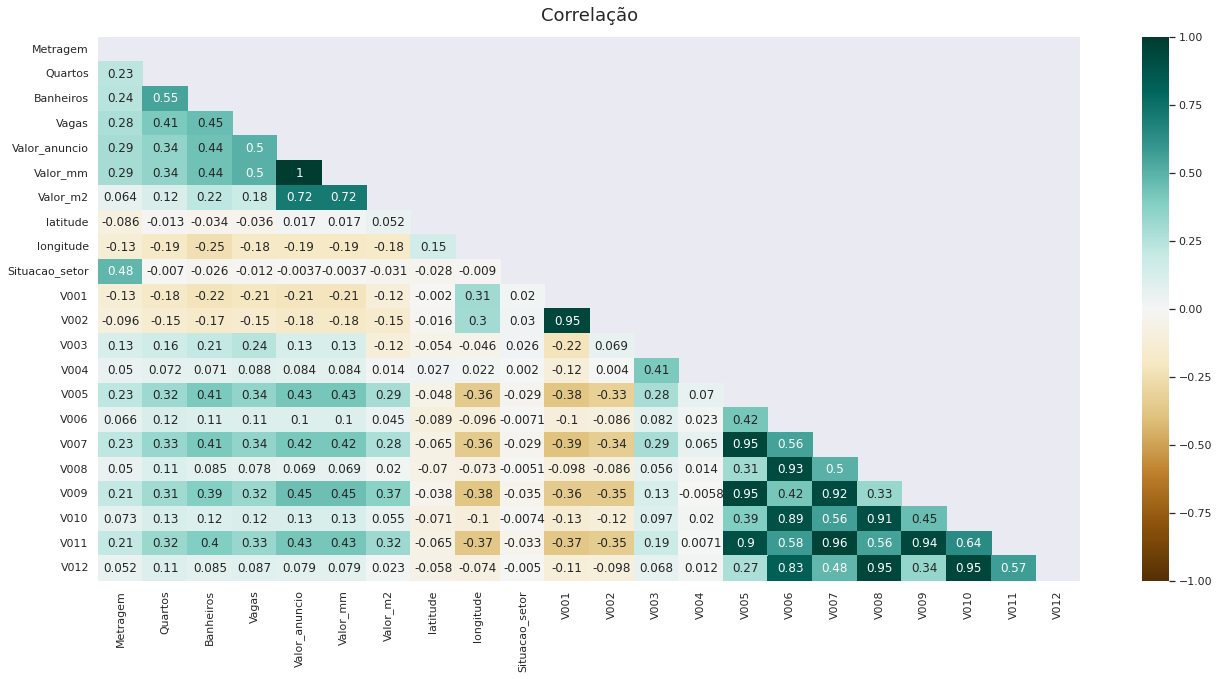

In [ ]:
# https://www.tylervigen.com/spurious-correlations
plt.figure(figsize = (22, 10))
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype = bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlação', fontdict = {'fontsize': 18}, pad = 16)

plt.show()

**Treinando o primeiro modelo de Regressão Linear**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dados_vendas_censo[['Metragem']]
y = dados_vendas_censo['Valor_anuncio']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 54)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train) #pro fit é preciso passar as variaveis que vai passar como treinoe como resposta que no caso é X_train e y_train nessa ordem

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred # mostrando a predição e comparando com o modedo abaixo

array([2837669.48953616, 2300411.09112863, 1753203.46312096, ...,
       1504472.72311747,  459803.61510282,  957265.0951098 ])

In [ ]:
y_test # comparando agora e vendo que a uma descrepancia consideravel

5009    3100000.00
4183    2500000.00
792     3350000.00
1755    5500000.00
5114     870000.00
           ...    
2348    1600000.00
4466   12000000.00
3960    1590000.00
5412     590000.00
127      600000.00
Name: Valor_anuncio, Length: 1062, dtype: float64

In [ ]:
mean_absolute_error(y_test, y_pred)

1622179.9492464326

**Treinando o segundo modelo de Regressão Linea**r

In [ ]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 
                        'Vagas', 'latitude', 'longitude', 'V001', 'V002', 
                        'V003', 'V004', 'V005', 'V006', 
                        'V007', 'V008', 'V009', 'V010', 
                        'V011', 'V012']]

y = dados_vendas_censo['Valor_anuncio']

In [ ]:
# imputando com KNN os missing values
imputer = KNNImputer(n_neighbors=2)
# fit nos dados
imputer.fit(X)
# transform 
X = imputer.transform(X)

In [ ]:
X

array([[1.00000000e+03, 4.00000000e+00, 8.00000000e+00, ...,
        1.30298516e+07, 3.93035000e+03, 1.72415767e+07],
       [4.96000000e+02, 4.00000000e+00, 4.00000000e+00, ...,
        2.67606829e+07, 6.06392000e+03, 2.75026749e+07],
       [1.25000000e+02, 4.00000000e+00, 3.00000000e+00, ...,
        4.26672780e+05, 8.58510000e+02, 4.14378880e+05],
       ...,
       [9.50000000e+01, 2.00000000e+00, 2.00000000e+00, ...,
        4.26181401e+06, 2.06209000e+03, 4.59675957e+06],
       [2.05000000e+02, 3.00000000e+00, 3.00000000e+00, ...,
        1.60218256e+07, 4.36279000e+03, 1.62643783e+07],
       [1.22000000e+02, 3.00000000e+00, 2.00000000e+00, ...,
        9.88708130e+05, 1.22686000e+03, 9.47807310e+05]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 54)

lr = LinearRegression()

lr.fit(X_train, y_train) 

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

mae_2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

In [ ]:
print(mae_2)
print(r2_2)

1469329.280038458
-4.6503556227172975


**Treinando o terceiro modelo de Regressão Linear**

In [ ]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V005', 'V007', 'V009', 'V011']]

y = dados_vendas_censo['Valor_anuncio']

In [ ]:
# imputando com KNN os missing values
imputer = KNNImputer(n_neighbors=2)
# fit nos dados
imputer.fit(X)
# transform 
X = imputer.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 54)

lr = LinearRegression()

lr.fit(X_train, y_train) 

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

In [ ]:
print(mae_lr)
print(r2_lr)

1485445.0953888323
-4.839742464336518


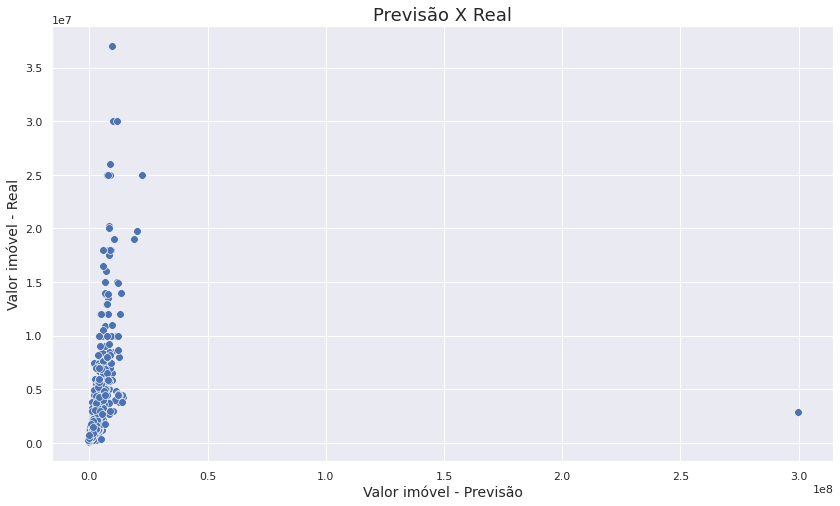

In [ ]:
ax = sns.scatterplot(x=y_pred, y=y_test, s = 60)
ax.figure.set_size_inches(14, 8)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Valor imóvel - Previsão', fontsize=14)
ax.set_ylabel('Valor imóvel - Real', fontsize=14)
ax;

# **Desafios Aula 05**

### **Adicionar o valor "real" do m² do imóvel**.





### **Testar outro modelo de regressão. checked**

**Treinando modelo utilizando Random Forest**

In [ ]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V005', 'V007', 'V009', 'V011']]

y = dados_vendas_censo['Valor_anuncio']

In [ ]:
# imputando com KNN os missing values
imputer = KNNImputer(n_neighbors=2)
# fit nos dados
imputer.fit(X)
# transform 
X = imputer.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 54)

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X,y)

rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

In [ ]:
print(mae_rf)
print(r2_rf)

848756.8367039869
0.6058578329407724


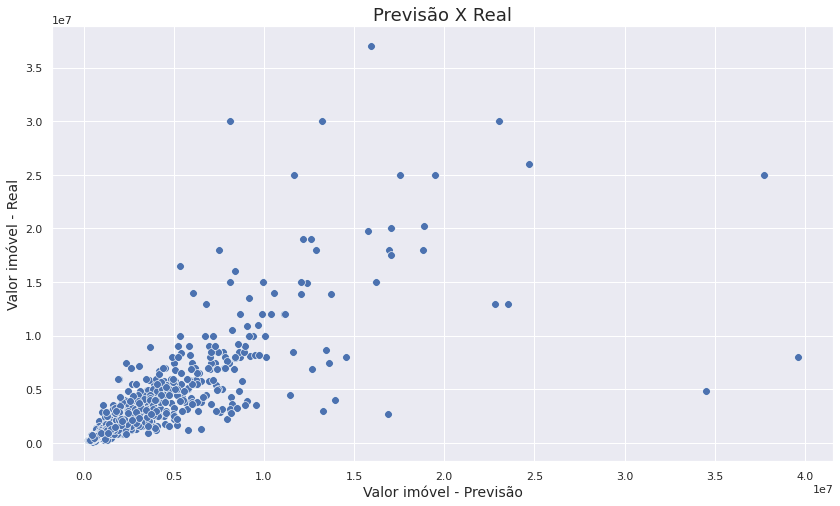

In [ ]:
ax = sns.scatterplot(x=y_pred, y=y_test, s = 60)
ax.figure.set_size_inches(14, 8)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Valor imóvel - Previsão', fontsize=14)
ax.set_ylabel('Valor imóvel - Real', fontsize=14)
ax;

Alterando o algoritmo para o treinamento dos dados para Random Forest obtive uma melhora bastante expressiva.

In [ ]:
print(f'Randon Forest - MAE: {mae_rf} R²: {r2_rf}.')
print(f'Linear Regression - MAE: {mae_lr} R²: {r2_lr}.') 

Randon Forest - MAE: 848756.8367039869 R²: 0.6058578329407724.
Linear Regression - MAE: 1485445.0953888323 R²: -4.839742464336518.


### **Criar um modelo baseline com as features originais. checked**

In [ ]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas']]

y = dados_vendas_censo['Valor_anuncio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 54)

lr = LinearRegression()

lr.fit(X_train, y_train) 

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

mae_4 = mean_absolute_error(y_test, y_pred)
r2_4 = r2_score(y_test, y_pred)

In [ ]:
print(mae_4)
print(r2_4)

1566450.8833563144
-5.374112566482672


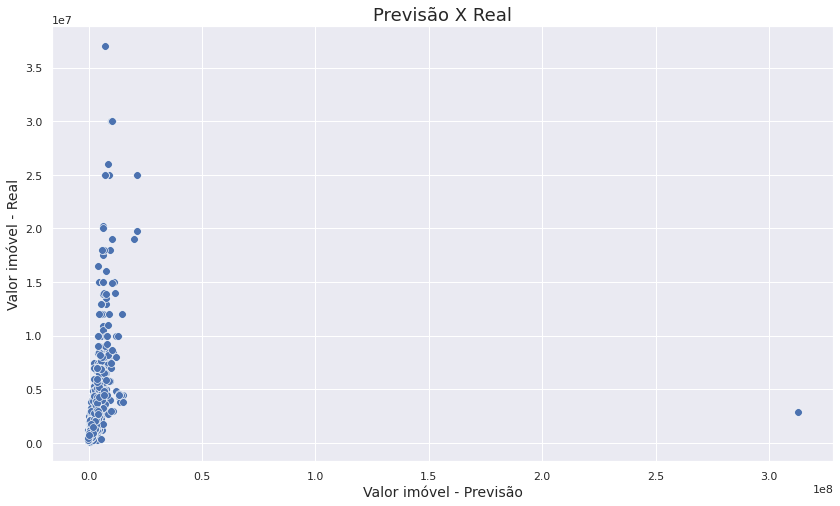

In [ ]:
ax = sns.scatterplot(x=y_pred, y=y_test, s = 60)
ax.figure.set_size_inches(14, 8)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Valor imóvel - Previsão', fontsize=14)
ax.set_ylabel('Valor imóvel - Real', fontsize=14)
ax;

Hipótese dos dados coletados pela base de dados do IBGE não terem tanto efeito no treinamento, não tendo o resultado sofrido nenhum aumento quando utilizado essas variáveis.l

### **Trabalhar mais nos dados e criar novas variáveis. checked (retirada de outliers das variáveis Metragem, Quartos, Banheiros, Vagas)**

###**Testar as predições para casos reais. checked**

In [ ]:
# simular entrada
Metragem = 85
Quartos = 4
Banheiros = 2
Vagas = 1
V005 = 6000  # Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
V007 = 7000  # Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
V009 = 3000  # Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
V011 = 4000  # Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)

entrada = [[Metragem,
            Quartos,
            Banheiros,
            Vagas,
            V005,
            V007,
            V009,
            V011
           ]]

print('R$ {0:.2f}'.format((rf.predict(entrada)[0])))

R$ 767700.00
